## imports

In [1]:
import pandas as pd
import datetime
import tqdm

/var/folders/s2/b3k7zpq9343b9dt9f_c0vlvr0000gn/T/ipykernel_4685/1277657384.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## choose variables


In [2]:
filter_country = False
selected_country = 'Country A'

filter_vehiclegroup = False
selcted_vehiclegroup = 'vehiclegroup01' 

### wheel
use_all_features = True # if false, assign checkup_features here
checkup_features = ['quota__vehiclegroup01__aq'],['sales_flow_monthly__vehiclegroup01__cp8']
data_input = 'all' #all, internal, external
predict_future_values = False #after row 258

filename = 'run_'+selected_country+'_'+data_input+'_'

#methods
mean_per_month = True
median_per_month = True
interpolation_linear = True
interpolation_spline = True
fill_zero = True

In [3]:
df = pd.read_csv("../Data/kitCapstoneJan24_data.csv", sep=";")

In [4]:
#Get rows with for country A
if filter_country:
    df_country_a = df[df['countryname'] == selected_country]
    df_country_a
else:
    df_country_a = df[df['countryname'] == 'Country A']
    df_country_b = df[df['countryname'] == 'Country B'].iloc[:,:950]
    # Edit column names
    for column in df_country_b.columns:
        new_column_name = 'country_b_' + column
        df_country_b.rename(columns={column: new_column_name}, inplace=True)

    df_country_c = df[df['countryname'] == 'Country C'].iloc[:,:950]
        # Edit column names
    for column in df_country_c.columns:
        new_column_name = 'country_c_' + column
        df_country_c.rename(columns={column: new_column_name}, inplace=True)
    
    df_country_d = df[df['countryname'] == 'Country D'].iloc[:,:950]
    # Edit column names
    for column in df_country_d.columns:
        new_column_name = 'country_d_' + column
        df_country_d.rename(columns={column: new_column_name}, inplace=True)

    # Merge the dataframes
    df_merged = pd.concat([df_country_a, df_country_b, df_country_c, df_country_d], axis=1)

    # Print the merged dataframe
df_country_a  = df_merged[:360]

In [5]:
# add additional feature month_normalized
df_country_a['month_normalized'] = df_country_a['month'] % 12

df_country_a = df_country_a[['month_normalized','month', 'countryname'] + [col for col in df_country_a.columns if col not in ['month_normalized','month', 'countryname']]]

/var/folders/s2/b3k7zpq9343b9dt9f_c0vlvr0000gn/T/ipykernel_4685/4198547896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country_a['month_normalized'] = df_country_a['month'] % 12


In [6]:

if filter_vehiclegroup:
    ## select vehiclegroups
    # delete all columns that are for a diffe
    df1 = df_country_a

    # create new dataframe with month and all columns containing vehiclegroup01
    df2 = df1.filter(regex=selcted_vehiclegroup)
    df2.head()

    # drop columns in df1 which contain vehiclegroup
    df3 = df1.drop(df1.filter(regex='vehiclegroup').columns, axis=1)
    df3.head()

    # merge df2 and df3 by index
    df4 = df2.merge(df3, left_index=True, right_index=True)
    df4.head()

    # is there a column month in df4?
    df4.columns.str.contains('month').any()
    # column month should be the first column, second column is countryname
    df4 = df4[['month_normalized','month', 'countryname'] + [col for col in df4.columns if col not in ['month_normalized','month', 'countryname']]]

    # drop rows after row 258
    #test = df4.drop(df4.index[258:])
    test = df4
else:
    test = df_country_a 

In [7]:
df_overall = test

In [8]:
df_overall

,month_normalized,month,countryname,sales_actuals_monthly__vehiclegroup01__orderintake,sales_actuals_monthly__vehiclegroup01__retail,sales_actuals_monthly__vehiclegroup02__orderintake,sales_actuals_monthly__vehiclegroup02__retail,sales_actuals_monthly__vehiclegroup03__orderintake,sales_actuals_monthly__vehiclegroup03__retail,sales_actuals_monthly__vehiclegroup04__orderintake,...,country_d_quota__vehiclegroup55__aq,country_d_quota__vehiclegroup56__aq,country_d_quota__vehiclegroup57__aq,country_d_quota__vehiclegroup58__aq,country_d_quota__vehiclegroup59__aq,country_d_quota__vehiclegroup60__aq,country_d_quota__vehiclegroup61__aq,country_d_quota__vehiclegroup62__aq,country_d_quota__vehiclegroup63__aq,country_d_quota__vehiclegroup64__aq
0,1.0,1.0,Country A,296.0,352.0,739.0,471.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2.0,Country A,414.0,372.0,904.0,528.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,3.0,Country A,405.0,604.0,1000.0,953.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,4.0,Country A,359.0,483.0,828.0,972.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,5.0,Country A,403.0,474.0,594.0,900.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,8.0,356.0,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,9.0,357.0,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357,10.0,358.0,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358,11.0,359.0,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# dataframe with first 18 columns (internal data)

if filter_vehiclegroup:
    df_internal = df_overall.iloc[:, :21]
    df_internal.head()
else:
    df_internal = df_overall.iloc[:, :951]
    df_internal.head()

df_internal.head()

,month_normalized,month,countryname,sales_actuals_monthly__vehiclegroup01__orderintake,sales_actuals_monthly__vehiclegroup01__retail,sales_actuals_monthly__vehiclegroup02__orderintake,sales_actuals_monthly__vehiclegroup02__retail,sales_actuals_monthly__vehiclegroup03__orderintake,sales_actuals_monthly__vehiclegroup03__retail,sales_actuals_monthly__vehiclegroup04__orderintake,...,quota__vehiclegroup55__aq,quota__vehiclegroup56__aq,quota__vehiclegroup57__aq,quota__vehiclegroup58__aq,quota__vehiclegroup59__aq,quota__vehiclegroup60__aq,quota__vehiclegroup61__aq,quota__vehiclegroup62__aq,quota__vehiclegroup63__aq,quota__vehiclegroup64__aq
0,1.0,1.0,Country A,296.0,352.0,739.0,471.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2.0,Country A,414.0,372.0,904.0,528.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,3.0,Country A,405.0,604.0,1000.0,953.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,4.0,Country A,359.0,483.0,828.0,972.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,5.0,Country A,403.0,474.0,594.0,900.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
if filter_vehiclegroup:
    df_external = test.iloc[:, 21:]
    df_external.loc[:, 'month_normalized'] = test['month_normalized']
    df_external.head()
else:
    df_external = test.iloc[:, 951:]
    df_external.loc[:, 'month_normalized'] = test['month_normalized']
    df_external.head()
df_external.head()

,global_consumer__alcoholic_beverages,global_consumer__apparel,global_consumer__apparel_footwear,global_consumer__appliances,global_consumer__automobiles,global_consumer__average_disposable_income_of_urban_households_nominal,global_consumer__average_disposable_income_of_urban_households_real,global_consumer__average_income,global_consumer__beer,global_consumer__building_materials_garden_supply,...,country_d_quota__vehiclegroup56__aq,country_d_quota__vehiclegroup57__aq,country_d_quota__vehiclegroup58__aq,country_d_quota__vehiclegroup59__aq,country_d_quota__vehiclegroup60__aq,country_d_quota__vehiclegroup61__aq,country_d_quota__vehiclegroup62__aq,country_d_quota__vehiclegroup63__aq,country_d_quota__vehiclegroup64__aq,month_normalized
0,87.206968,255.462236,301.743202,41.505972,230.716125,0.0,0.0,46.394457,34.695874,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,87.206968,255.462236,301.743202,41.505972,230.716125,0.0,0.0,122.084727,34.695874,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,87.206968,255.462236,301.743202,41.505972,230.716125,0.0,0.0,122.084727,34.695874,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
3,87.206968,255.462236,301.743202,41.505972,230.716125,0.0,0.0,122.084727,34.695874,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
4,87.206968,255.462236,301.743202,41.505972,230.716125,0.0,0.0,122.084727,34.695874,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0


In [11]:
df_overall_future = df_overall.iloc[:259,]


# Assuming df_external_info is a DataFrame
nan_columns = df_overall_future.isna().any()
nan_counts = df_overall_future.isna().sum()


# Create a list of rows
rows = []
for col, count in nan_counts.items():
    if count > 50:
        row = {"name": col, "NaN Count": count}
        rows.append(row)

# Create a DataFrame
nan_info_df = pd.DataFrame(rows, columns=["name", "NaN Count"])

nan_info_df

nan_info_df.to_csv('../output_data/'+filename+datetime.datetime.now().strftime("%H%M")+'nan_list.csv')

# Create a list of rows
rows = []
for col, count in nan_counts.items():
    if count <= 50:
        row = {"name": col, "NaN Count": count}
        rows.append(row)

# Create a DataFrame
not_nan_info_df = pd.DataFrame(rows, columns=["name", "NaN Count"])

not_nan_info_df

not_nan_info_df.to_csv('../output_data/'+filename+datetime.datetime.now().strftime("%H%M")+'not_nan_list.csv')

In [12]:
country_a_y = df_country_a['sales_actuals_monthly__vehiclegroup01__orderintake']

### feature filling wheel

In [13]:
df_overall.iloc[258:, :]

,month_normalized,month,countryname,sales_actuals_monthly__vehiclegroup01__orderintake,sales_actuals_monthly__vehiclegroup01__retail,sales_actuals_monthly__vehiclegroup02__orderintake,sales_actuals_monthly__vehiclegroup02__retail,sales_actuals_monthly__vehiclegroup03__orderintake,sales_actuals_monthly__vehiclegroup03__retail,sales_actuals_monthly__vehiclegroup04__orderintake,...,country_d_quota__vehiclegroup55__aq,country_d_quota__vehiclegroup56__aq,country_d_quota__vehiclegroup57__aq,country_d_quota__vehiclegroup58__aq,country_d_quota__vehiclegroup59__aq,country_d_quota__vehiclegroup60__aq,country_d_quota__vehiclegroup61__aq,country_d_quota__vehiclegroup62__aq,country_d_quota__vehiclegroup63__aq,country_d_quota__vehiclegroup64__aq
258,7.0,259.0,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
259,8.0,260.0,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,9.0,261.0,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,10.0,262.0,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,11.0,263.0,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,8.0,356.0,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,9.0,357.0,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357,10.0,358.0,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358,11.0,359.0,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_overall

,month_normalized,month,countryname,sales_actuals_monthly__vehiclegroup01__orderintake,sales_actuals_monthly__vehiclegroup01__retail,sales_actuals_monthly__vehiclegroup02__orderintake,sales_actuals_monthly__vehiclegroup02__retail,sales_actuals_monthly__vehiclegroup03__orderintake,sales_actuals_monthly__vehiclegroup03__retail,sales_actuals_monthly__vehiclegroup04__orderintake,...,country_d_quota__vehiclegroup55__aq,country_d_quota__vehiclegroup56__aq,country_d_quota__vehiclegroup57__aq,country_d_quota__vehiclegroup58__aq,country_d_quota__vehiclegroup59__aq,country_d_quota__vehiclegroup60__aq,country_d_quota__vehiclegroup61__aq,country_d_quota__vehiclegroup62__aq,country_d_quota__vehiclegroup63__aq,country_d_quota__vehiclegroup64__aq
0,1.0,1.0,Country A,296.0,352.0,739.0,471.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2.0,Country A,414.0,372.0,904.0,528.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,3.0,Country A,405.0,604.0,1000.0,953.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,4.0,Country A,359.0,483.0,828.0,972.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,5.0,Country A,403.0,474.0,594.0,900.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,8.0,356.0,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,9.0,357.0,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357,10.0,358.0,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358,11.0,359.0,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
checkup_features

(['quota__vehiclegroup01__aq'], ['sales_flow_monthly__vehiclegroup01__cp8'])

In [16]:
import warnings
warnings.filterwarnings("ignore") #turn of warnings

print(data_input)

if data_input == 'all':
    input_df = df_overall.iloc
elif data_input == 'internal':
    input_df = df_internal
elif data_input == 'external':
    input_df = df_external

if not predict_future_values:
    input_df = df_overall.iloc[:258, :]#.head(258)  # Select the first 258 rows as the first part
    df_second_part = df_overall.iloc[258:, :]#tail(102)  # Select the last 102 rows as the second part
    print('head',input_df.shape)
    #print('tail',df_second_part.shape)

if use_all_features:
    checkup_features = df_overall.iloc[:258, :]

# Create a progress bar
pbar = tqdm.tqdm(total=len(checkup_features))
for feature in checkup_features:
    #print(input_df[feature].isna().any(), feature)
    if input_df[feature].isna().any():
        if input_df[feature].isna().all():
            print(f"Column {feature} has only NaN values. Dropping it.")
            input_df.drop(columns=feature, axis=1, inplace=True)
            df_second_part.drop(columns=feature, axis=1, inplace=True)
        else:
            if mean_per_month:
                # add mean per month
                # Fill in missing values using the corresponding month values
                month_means = {}
                for i in range(len(input_df)):
                    month = input_df.iloc[i]['month_normalized']
                    month_values = input_df.loc[input_df['month_normalized'] == month, feature]
                    if not month_values.isnull().values.all():
                        month_means[month] = month_values.mean()

                # Fill in missing values using the corresponding month values
                input_df[feature+'_meanbymonth']=input_df[feature].loc[:].fillna(input_df['month_normalized'].map(month_means))

            if median_per_month:
                # add median per month
                # Fill in missing values using the corresponding month values
                month_medians = {}
                for i in range(len(input_df)):
                    month = input_df.iloc[i]['month_normalized']
                    month_values = input_df.loc[input_df['month_normalized'] == month, feature]
                    if not month_values.isnull().values.all():
                        month_medians[month] = month_values.median(skipna=True)
                
                input_df[feature + '_medianbymonth'] = (input_df[feature].loc[:].
                                                        fillna(input_df['month_normalized']
                                                            .map(month_medians)))

            if interpolation_linear:
                input_df[feature+'_interpolated_linear']=input_df[feature].interpolate(method='linear', limit_direction = 'both')

            if interpolation_spline:
                input_df[feature + '_interpolation_spline'] = input_df[feature].interpolate(method='spline', limit_direction = 'both', order=3)
        
            if fill_zero:
                input_df[feature+'_fill_zero']=input_df[feature].fillna(0)

            input_df.drop(columns=feature, inplace=True)
            df_second_part.drop(columns=feature, inplace=True)
    pbar.update(1)

if not predict_future_values:       
    input_df2 = pd.concat([input_df, df_second_part], axis=0)  # Concatenate the two DataFrames along the row axis


output_df = input_df

# Close the progress bar
pbar.close()

all
head (258, 5220)


  0%|          | 0/5220 [00:00<?, ?it/s]

  2%|▏         | 99/5220 [00:48<52:07,  1.64it/s]

Column sales_actuals_monthly__vehiclegroup49__orderintake has only NaN values. Dropping it.
Column sales_actuals_monthly__vehiclegroup49__retail has only NaN values. Dropping it.


  2%|▏         | 105/5220 [00:50<43:17,  1.97it/s]

Column sales_actuals_monthly__vehiclegroup52__orderintake has only NaN values. Dropping it.
Column sales_actuals_monthly__vehiclegroup52__retail has only NaN values. Dropping it.


  2%|▏         | 111/5220 [00:53<41:37,  2.05it/s]

Column sales_actuals_monthly__vehiclegroup55__orderintake has only NaN values. Dropping it.
Column sales_actuals_monthly__vehiclegroup55__retail has only NaN values. Dropping it.


 16%|█▌        | 829/5220 [28:51<1:34:23,  1.29s/it]   

Column premises__vehiclegroup49__flag_production_start has only NaN values. Dropping it.
Column premises__vehiclegroup49__in_production has only NaN values. Dropping it.


 16%|█▌        | 839/5220 [29:01<1:30:35,  1.24s/it]

Column premises__vehiclegroup52__flag_production_start has only NaN values. Dropping it.
Column premises__vehiclegroup52__in_production has only NaN values. Dropping it.


 16%|█▋        | 849/5220 [29:12<1:32:35,  1.27s/it]

Column premises__vehiclegroup55__flag_production_start has only NaN values. Dropping it.
Column premises__vehiclegroup55__in_production has only NaN values. Dropping it.


 17%|█▋        | 871/5220 [29:39<1:35:55,  1.32s/it]

Column premises__vehiclegroup61__flag_order_start has only NaN values. Dropping it.
Column premises__vehiclegroup61__in_sales has only NaN values. Dropping it.


 18%|█▊        | 935/5220 [31:04<1:42:14,  1.43s/it]

Column quota__vehiclegroup49__aq has only NaN values. Dropping it.


 18%|█▊        | 938/5220 [31:07<1:27:33,  1.23s/it]

Column quota__vehiclegroup52__aq has only NaN values. Dropping it.


 18%|█▊        | 941/5220 [31:10<1:19:49,  1.12s/it]

Column quota__vehiclegroup55__aq has only NaN values. Dropping it.


 24%|██▍       | 1244/5220 [31:22<00:46, 86.08it/s] 

Column global_economy__bop_cap_account_bal_us__u_s_dollar has only NaN values. Dropping it.
Column global_economy__bop_current_account_balance_us__u_s_dollar has only NaN values. Dropping it.
Column global_economy__bop_direct_investment_asset_debit_capital_outflow_us__u_s_dollar has only NaN values. Dropping it.
Column global_economy__bop_direct_investment_balance_or_net_fdi_net_capital_inflow_us__u_s_dollar has only NaN values. Dropping it.
Column global_economy__bop_direct_investment_liability_or_fdi_credit_capital_inflow_us__u_s_dollar has only NaN values. Dropping it.
Column global_economy__bop_factor_service_balance_net_foreign_investment_income_us__u_s_dollar has only NaN values. Dropping it.


 25%|██▌       | 1315/5220 [31:23<00:37, 103.38it/s]

Column global_economy__bop_factor_service_exports_and_credits_investment_income_receipts_from_the_rest_of_the_world_us__u_s_dollar has only NaN values. Dropping it.
Column global_economy__bop_factor_service_imports_and_debits_investment_income_payments_to_the_rest_of_the_world_us__u_s_dollar has only NaN values. Dropping it.
Column global_economy__bop_financial_account_balance_us__u_s_dollar has only NaN values. Dropping it.
Column global_economy__bop_non_factor_service_balance_us__u_s_dollar has only NaN values. Dropping it.
Column global_economy__bop_non_factor_service_exports_us__u_s_dollar has only NaN values. Dropping it.
Column global_economy__bop_non_factor_service_imports_us__u_s_dollar has only NaN values. Dropping it.


 26%|██▋       | 1373/5220 [31:23<00:31, 120.70it/s]

Column global_economy__bop_other_investment_asset_debit_capital_outflow_us__u_s_dollar has only NaN values. Dropping it.
Column global_economy__bop_other_investment_liability_credit_capital_inflow_us__u_s_dollar has only NaN values. Dropping it.
Column global_economy__bop_portfolio_investment_asset_debit_capital_outflow_us__u_s_dollar has only NaN values. Dropping it.
Column global_economy__bop_portfolio_investment_balance_net_capital_inflow_us__u_s_dollar has only NaN values. Dropping it.
Column global_economy__bop_portfolio_investment_liability_credit_capital_inflow_us__u_s_dollar has only NaN values. Dropping it.
Column global_economy__bop_transfer_payments_balance_us__u_s_dollar has only NaN values. Dropping it.


 39%|███▉      | 2031/5220 [31:23<00:05, 633.21it/s]

Column global_economy__bop_transfer_payments_credit_us__u_s_dollar has only NaN values. Dropping it.
Column global_economy__bop_transfer_payments_debit_us__u_s_dollar has only NaN values. Dropping it.
Column global_economy__international_reserves_lcu__u_s_dollar has only NaN values. Dropping it.
Column global_economy__net_personal_saving_rate_personal_saving_as_a_of_disposable_income__forecast has only NaN values. Dropping it.
Column global_economy__personal_saving_household_saving_euro__forecast_billion_euros_synthetic_euros_prior_to_1999 has only NaN values. Dropping it.
Column global_economy__personal_saving_household_saving_lcu__forecast_billion has only NaN values. Dropping it.


 43%|████▎     | 2238/5220 [31:23<00:04, 731.52it/s]

Column global_economy__personal_saving_household_saving_us__forecast_billion has only NaN values. Dropping it.
Column global_economy__real_exchange_rate_with_japan_japanese_prices_per_local_prices__japanese_yen has only NaN values. Dropping it.
Column global_economy__real_exchange_rate_with_us_us_prices_per_local_prices__u_s_dollar has only NaN values. Dropping it.
Column global_economy__wholesale_producer_price_index_lcu_basus__index has only NaN values. Dropping it.


 45%|████▍     | 2339/5220 [31:42<01:30, 31.78it/s] 

Column registrations__vwm_luxus_maserati has only NaN values. Dropping it.


 45%|████▌     | 2354/5220 [32:02<04:27, 10.70it/s]

Column registrations__vwm_luxus_mclaren has only NaN values. Dropping it.
Column registrations__vwm_luxus_alpina has only NaN values. Dropping it.


 45%|████▌     | 2373/5220 [32:22<09:20,  5.08it/s]

Column country_b_month has only NaN values. Dropping it.
Column country_b_countryname has only NaN values. Dropping it.
Column country_b_sales_actuals_monthly__vehiclegroup01__orderintake has only NaN values. Dropping it.
Column country_b_sales_actuals_monthly__vehiclegroup01__retail has only NaN values. Dropping it.
Column country_b_sales_actuals_monthly__vehiclegroup02__orderintake has only NaN values. Dropping it.
Column country_b_sales_actuals_monthly__vehiclegroup02__retail has only NaN values. Dropping it.
Column country_b_sales_actuals_monthly__vehiclegroup03__orderintake has only NaN values. Dropping it.
Column country_b_sales_actuals_monthly__vehiclegroup03__retail has only NaN values. Dropping it.
Column country_b_sales_actuals_monthly__vehiclegroup04__orderintake has only NaN values. Dropping it.
Column country_b_sales_actuals_monthly__vehiclegroup04__retail has only NaN values. Dropping it.
Column country_b_sales_actuals_monthly__vehiclegroup05__orderintake has only NaN val

 47%|████▋     | 2437/5220 [32:25<05:58,  7.76it/s]

Column country_b_sales_actuals_monthly__vehiclegroup33__orderintake has only NaN values. Dropping it.
Column country_b_sales_actuals_monthly__vehiclegroup33__retail has only NaN values. Dropping it.
Column country_b_sales_actuals_monthly__vehiclegroup34__orderintake has only NaN values. Dropping it.
Column country_b_sales_actuals_monthly__vehiclegroup34__retail has only NaN values. Dropping it.
Column country_b_sales_actuals_monthly__vehiclegroup35__orderintake has only NaN values. Dropping it.
Column country_b_sales_actuals_monthly__vehiclegroup35__retail has only NaN values. Dropping it.
Column country_b_sales_actuals_monthly__vehiclegroup36__orderintake has only NaN values. Dropping it.
Column country_b_sales_actuals_monthly__vehiclegroup36__retail has only NaN values. Dropping it.
Column country_b_sales_actuals_monthly__vehiclegroup37__orderintake has only NaN values. Dropping it.
Column country_b_sales_actuals_monthly__vehiclegroup37__retail has only NaN values. Dropping it.
Colum

 48%|████▊     | 2482/5220 [32:26<04:37,  9.85it/s]

Column country_b_sales_actuals_monthly__vehiclegroup54__orderintake has only NaN values. Dropping it.
Column country_b_sales_actuals_monthly__vehiclegroup54__retail has only NaN values. Dropping it.
Column country_b_sales_actuals_monthly__vehiclegroup55__orderintake has only NaN values. Dropping it.
Column country_b_sales_actuals_monthly__vehiclegroup55__retail has only NaN values. Dropping it.
Column country_b_sales_actuals_monthly__vehiclegroup56__orderintake has only NaN values. Dropping it.
Column country_b_sales_actuals_monthly__vehiclegroup56__retail has only NaN values. Dropping it.
Column country_b_sales_actuals_monthly__vehiclegroup57__orderintake has only NaN values. Dropping it.
Column country_b_sales_actuals_monthly__vehiclegroup57__retail has only NaN values. Dropping it.
Column country_b_sales_actuals_monthly__vehiclegroup58__orderintake has only NaN values. Dropping it.
Column country_b_sales_actuals_monthly__vehiclegroup58__retail has only NaN values. Dropping it.
Colum

 48%|████▊     | 2515/5220 [32:28<03:53, 11.57it/s]

Column country_b_sales_flow_monthly__vehiclegroup14__cp8 has only NaN values. Dropping it.
Column country_b_sales_flow_monthly__vehiclegroup15__cp8 has only NaN values. Dropping it.
Column country_b_sales_flow_monthly__vehiclegroup16__cp8 has only NaN values. Dropping it.
Column country_b_sales_flow_monthly__vehiclegroup17__cp8 has only NaN values. Dropping it.
Column country_b_sales_flow_monthly__vehiclegroup18__cp8 has only NaN values. Dropping it.
Column country_b_sales_flow_monthly__vehiclegroup19__cp8 has only NaN values. Dropping it.
Column country_b_sales_flow_monthly__vehiclegroup20__cp8 has only NaN values. Dropping it.
Column country_b_sales_flow_monthly__vehiclegroup21__cp8 has only NaN values. Dropping it.
Column country_b_sales_flow_monthly__vehiclegroup22__cp8 has only NaN values. Dropping it.
Column country_b_sales_flow_monthly__vehiclegroup23__cp8 has only NaN values. Dropping it.
Column country_b_sales_flow_monthly__vehiclegroup24__cp8 has only NaN values. Dropping it.

 49%|████▊     | 2539/5220 [32:29<03:25, 13.07it/s]

Column country_b_sales_flow_monthly__vehiclegroup38__cp8 has only NaN values. Dropping it.
Column country_b_sales_flow_monthly__vehiclegroup39__cp8 has only NaN values. Dropping it.
Column country_b_sales_flow_monthly__vehiclegroup40__cp8 has only NaN values. Dropping it.
Column country_b_sales_flow_monthly__vehiclegroup41__cp8 has only NaN values. Dropping it.
Column country_b_sales_flow_monthly__vehiclegroup42__cp8 has only NaN values. Dropping it.
Column country_b_sales_flow_monthly__vehiclegroup43__cp8 has only NaN values. Dropping it.
Column country_b_sales_flow_monthly__vehiclegroup44__cp8 has only NaN values. Dropping it.
Column country_b_sales_flow_monthly__vehiclegroup45__cp8 has only NaN values. Dropping it.
Column country_b_sales_flow_monthly__vehiclegroup46__cp8 has only NaN values. Dropping it.
Column country_b_sales_flow_monthly__vehiclegroup47__cp8 has only NaN values. Dropping it.
Column country_b_sales_flow_monthly__vehiclegroup48__cp8 has only NaN values. Dropping it.

 49%|████▉     | 2557/5220 [32:29<03:06, 14.28it/s]

Column country_b_sales_flow_monthly__vehiclegroup58__cp8 has only NaN values. Dropping it.
Column country_b_sales_flow_monthly__vehiclegroup59__cp8 has only NaN values. Dropping it.
Column country_b_sales_flow_monthly__vehiclegroup60__cp8 has only NaN values. Dropping it.
Column country_b_sales_flow_monthly__vehiclegroup61__cp8 has only NaN values. Dropping it.
Column country_b_sales_flow_monthly__vehiclegroup62__cp8 has only NaN values. Dropping it.
Column country_b_sales_flow_monthly__vehiclegroup63__cp8 has only NaN values. Dropping it.
Column country_b_sales_flow_monthly__vehiclegroup64__cp8 has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup01__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup01__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup01__netimporteranddealer has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup02__physic

 49%|████▉     | 2570/5220 [32:30<02:52, 15.34it/s]

Column country_b_sales_stock_monthly__vehiclegroup02__netimporteranddealer has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup03__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup03__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup03__netimporteranddealer has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup04__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup04__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup04__netimporteranddealer has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup05__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup05__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup05__netimporteranddealer has only NaN val

 49%|████▉     | 2580/5220 [32:30<02:41, 16.38it/s]

Column country_b_sales_stock_monthly__vehiclegroup06__netimporteranddealer has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup07__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup07__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup07__netimporteranddealer has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup08__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup08__grossall has only NaN values. Dropping it.


 50%|████▉     | 2588/5220 [32:30<02:32, 17.21it/s]

Column country_b_sales_stock_monthly__vehiclegroup08__netimporteranddealer has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup09__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup09__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup09__netimporteranddealer has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup10__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup10__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup10__netimporteranddealer has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup11__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup11__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup11__netimporteranddealer has only NaN val

 50%|████▉     | 2595/5220 [32:31<02:27, 17.86it/s]

Column country_b_sales_stock_monthly__vehiclegroup12__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup12__netimporteranddealer has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup13__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup13__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup13__netimporteranddealer has only NaN values. Dropping it.


 50%|████▉     | 2605/5220 [32:31<02:13, 19.60it/s]

Column country_b_sales_stock_monthly__vehiclegroup14__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup14__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup14__netimporteranddealer has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup15__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup15__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup15__netimporteranddealer has only NaN values. Dropping it.


 50%|████▉     | 2609/5220 [32:31<02:10, 20.07it/s]

Column country_b_sales_stock_monthly__vehiclegroup16__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup16__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup16__netimporteranddealer has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup17__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup17__grossall has only NaN values. Dropping it.


 50%|█████     | 2613/5220 [32:31<02:05, 20.69it/s]

Column country_b_sales_stock_monthly__vehiclegroup17__netimporteranddealer has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup18__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup18__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup18__netimporteranddealer has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup19__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup19__grossall has only NaN values. Dropping it.


 50%|█████     | 2620/5220 [32:32<01:58, 21.98it/s]

Column country_b_sales_stock_monthly__vehiclegroup19__netimporteranddealer has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup20__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup20__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup20__netimporteranddealer has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup21__physical has only NaN values. Dropping it.


 50%|█████     | 2626/5220 [32:32<01:59, 21.79it/s]

Column country_b_sales_stock_monthly__vehiclegroup21__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup21__netimporteranddealer has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup22__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup22__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup22__netimporteranddealer has only NaN values. Dropping it.


 50%|█████     | 2629/5220 [32:32<01:56, 22.33it/s]

Column country_b_sales_stock_monthly__vehiclegroup23__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup23__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup23__netimporteranddealer has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup24__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup24__grossall has only NaN values. Dropping it.


 50%|█████     | 2635/5220 [32:32<01:52, 22.94it/s]

Column country_b_sales_stock_monthly__vehiclegroup24__netimporteranddealer has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup25__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup25__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup25__netimporteranddealer has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup26__physical has only NaN values. Dropping it.


 51%|█████     | 2641/5220 [32:33<01:57, 21.86it/s]

Column country_b_sales_stock_monthly__vehiclegroup26__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup26__netimporteranddealer has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup27__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup27__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup27__netimporteranddealer has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup28__physical has only NaN values. Dropping it.


 51%|█████     | 2647/5220 [32:33<02:06, 20.32it/s]

Column country_b_sales_stock_monthly__vehiclegroup28__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup28__netimporteranddealer has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup29__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup29__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup29__netimporteranddealer has only NaN values. Dropping it.


 51%|█████     | 2650/5220 [32:33<02:01, 21.10it/s]

Column country_b_sales_stock_monthly__vehiclegroup30__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup30__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup30__netimporteranddealer has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup31__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup31__grossall has only NaN values. Dropping it.


 51%|█████     | 2656/5220 [32:33<01:53, 22.54it/s]

Column country_b_sales_stock_monthly__vehiclegroup31__netimporteranddealer has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup32__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup32__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup32__netimporteranddealer has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup33__physical has only NaN values. Dropping it.


 51%|█████     | 2662/5220 [32:34<01:58, 21.63it/s]

Column country_b_sales_stock_monthly__vehiclegroup33__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup33__netimporteranddealer has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup34__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup34__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup34__netimporteranddealer has only NaN values. Dropping it.


 51%|█████     | 2665/5220 [32:34<01:51, 22.83it/s]

Column country_b_sales_stock_monthly__vehiclegroup35__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup35__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup35__netimporteranddealer has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup36__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup36__grossall has only NaN values. Dropping it.


 51%|█████     | 2671/5220 [32:34<01:54, 22.20it/s]

Column country_b_sales_stock_monthly__vehiclegroup36__netimporteranddealer has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup37__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup37__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup37__netimporteranddealer has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup38__physical has only NaN values. Dropping it.


 51%|█████▏    | 2677/5220 [32:34<01:53, 22.47it/s]

Column country_b_sales_stock_monthly__vehiclegroup38__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup38__netimporteranddealer has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup39__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup39__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup39__netimporteranddealer has only NaN values. Dropping it.


 51%|█████▏    | 2683/5220 [32:35<01:44, 24.31it/s]

Column country_b_sales_stock_monthly__vehiclegroup40__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup40__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup40__netimporteranddealer has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup41__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup41__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup41__netimporteranddealer has only NaN values. Dropping it.


 51%|█████▏    | 2686/5220 [32:35<01:44, 24.17it/s]

Column country_b_sales_stock_monthly__vehiclegroup42__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup42__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup42__netimporteranddealer has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup43__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup43__grossall has only NaN values. Dropping it.


 52%|█████▏    | 2692/5220 [32:35<01:53, 22.19it/s]

Column country_b_sales_stock_monthly__vehiclegroup43__netimporteranddealer has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup44__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup44__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup44__netimporteranddealer has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup45__physical has only NaN values. Dropping it.


 52%|█████▏    | 2698/5220 [32:35<02:00, 20.93it/s]

Column country_b_sales_stock_monthly__vehiclegroup45__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup45__netimporteranddealer has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup46__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup46__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup46__netimporteranddealer has only NaN values. Dropping it.


 52%|█████▏    | 2704/5220 [32:36<01:51, 22.47it/s]

Column country_b_sales_stock_monthly__vehiclegroup47__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup47__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup47__netimporteranddealer has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup48__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup48__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup48__netimporteranddealer has only NaN values. Dropping it.


 52%|█████▏    | 2707/5220 [32:36<01:53, 22.12it/s]

Column country_b_sales_stock_monthly__vehiclegroup50__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup50__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup50__netimporteranddealer has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup51__physical has only NaN values. Dropping it.


 52%|█████▏    | 2713/5220 [32:36<01:53, 22.16it/s]

Column country_b_sales_stock_monthly__vehiclegroup51__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup51__netimporteranddealer has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup53__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup53__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup53__netimporteranddealer has only NaN values. Dropping it.


 52%|█████▏    | 2716/5220 [32:36<01:53, 22.11it/s]

Column country_b_sales_stock_monthly__vehiclegroup54__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup54__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup54__netimporteranddealer has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup56__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup56__grossall has only NaN values. Dropping it.


 52%|█████▏    | 2722/5220 [32:36<01:49, 22.73it/s]

Column country_b_sales_stock_monthly__vehiclegroup56__netimporteranddealer has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup57__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup57__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup57__netimporteranddealer has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup58__physical has only NaN values. Dropping it.


 52%|█████▏    | 2728/5220 [32:37<01:47, 23.19it/s]

Column country_b_sales_stock_monthly__vehiclegroup58__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup58__netimporteranddealer has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup59__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup59__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup59__netimporteranddealer has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup60__physical has only NaN values. Dropping it.


 52%|█████▏    | 2734/5220 [32:37<01:40, 24.62it/s]

Column country_b_sales_stock_monthly__vehiclegroup60__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup60__netimporteranddealer has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup61__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup61__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup61__netimporteranddealer has only NaN values. Dropping it.


 52%|█████▏    | 2737/5220 [32:37<01:43, 24.07it/s]

Column country_b_sales_stock_monthly__vehiclegroup62__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup62__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup62__netimporteranddealer has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup63__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup63__grossall has only NaN values. Dropping it.


 53%|█████▎    | 2743/5220 [32:37<01:43, 23.94it/s]

Column country_b_sales_stock_monthly__vehiclegroup63__netimporteranddealer has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup64__physical has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup64__grossall has only NaN values. Dropping it.
Column country_b_sales_stock_monthly__vehiclegroup64__netimporteranddealer has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup01__terminated_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup01__active_cars has only NaN values. Dropping it.


 53%|█████▎    | 2749/5220 [32:37<01:49, 22.52it/s]

Column country_b_customer_vehicle_relationships__vehiclegroup02__terminated_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup02__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup03__terminated_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup03__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup04__terminated_cars has only NaN values. Dropping it.


 53%|█████▎    | 2755/5220 [32:38<01:44, 23.67it/s]

Column country_b_customer_vehicle_relationships__vehiclegroup04__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup05__terminated_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup05__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup06__terminated_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup06__active_cars has only NaN values. Dropping it.


 53%|█████▎    | 2761/5220 [32:38<01:38, 24.89it/s]

Column country_b_customer_vehicle_relationships__vehiclegroup07__terminated_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup07__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup08__terminated_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup08__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup09__terminated_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup09__active_cars has only NaN values. Dropping it.


 53%|█████▎    | 2764/5220 [32:38<01:40, 24.45it/s]

Column country_b_customer_vehicle_relationships__vehiclegroup10__terminated_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup10__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup11__terminated_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup11__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup12__terminated_cars has only NaN values. Dropping it.


 53%|█████▎    | 2770/5220 [32:38<01:42, 23.84it/s]

Column country_b_customer_vehicle_relationships__vehiclegroup12__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup13__terminated_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup13__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup14__terminated_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup14__active_cars has only NaN values. Dropping it.


 53%|█████▎    | 2776/5220 [32:39<01:44, 23.46it/s]

Column country_b_customer_vehicle_relationships__vehiclegroup15__terminated_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup15__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup16__terminated_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup16__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup17__terminated_cars has only NaN values. Dropping it.


 53%|█████▎    | 2782/5220 [32:39<01:38, 24.65it/s]

Column country_b_customer_vehicle_relationships__vehiclegroup17__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup18__terminated_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup18__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup19__terminated_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup19__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup20__terminated_cars has only NaN values. Dropping it.


 53%|█████▎    | 2785/5220 [32:39<01:40, 24.25it/s]

Column country_b_customer_vehicle_relationships__vehiclegroup20__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup21__terminated_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup21__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup22__terminated_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup22__active_cars has only NaN values. Dropping it.


 53%|█████▎    | 2791/5220 [32:39<01:38, 24.69it/s]

Column country_b_customer_vehicle_relationships__vehiclegroup23__terminated_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup23__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup24__terminated_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup24__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup25__terminated_cars has only NaN values. Dropping it.


 54%|█████▎    | 2797/5220 [32:39<01:40, 24.17it/s]

Column country_b_customer_vehicle_relationships__vehiclegroup25__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup26__terminated_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup26__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup27__terminated_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup27__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup28__terminated_cars has only NaN values. Dropping it.


 54%|█████▎    | 2803/5220 [32:40<01:39, 24.33it/s]

Column country_b_customer_vehicle_relationships__vehiclegroup28__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup29__terminated_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup29__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup30__terminated_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup30__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup31__terminated_cars has only NaN values. Dropping it.


 54%|█████▍    | 2809/5220 [32:40<01:38, 24.56it/s]

Column country_b_customer_vehicle_relationships__vehiclegroup31__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup32__terminated_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup32__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup33__terminated_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup33__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup34__terminated_cars has only NaN values. Dropping it.


 54%|█████▍    | 2815/5220 [32:40<01:35, 25.20it/s]

Column country_b_customer_vehicle_relationships__vehiclegroup34__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup35__terminated_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup35__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup36__terminated_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup36__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup37__terminated_cars has only NaN values. Dropping it.


 54%|█████▍    | 2821/5220 [32:40<01:31, 26.09it/s]

Column country_b_customer_vehicle_relationships__vehiclegroup37__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup38__terminated_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup38__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup39__terminated_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup39__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup40__terminated_cars has only NaN values. Dropping it.


 54%|█████▍    | 2827/5220 [32:41<01:34, 25.28it/s]

Column country_b_customer_vehicle_relationships__vehiclegroup40__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup41__terminated_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup41__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup42__terminated_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup42__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup43__terminated_cars has only NaN values. Dropping it.


 54%|█████▍    | 2833/5220 [32:41<01:32, 25.94it/s]

Column country_b_customer_vehicle_relationships__vehiclegroup43__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup44__terminated_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup44__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup45__terminated_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup45__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup46__terminated_cars has only NaN values. Dropping it.


 54%|█████▍    | 2839/5220 [32:41<01:29, 26.47it/s]

Column country_b_customer_vehicle_relationships__vehiclegroup46__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup47__terminated_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup47__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup48__terminated_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup48__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup50__terminated_cars has only NaN values. Dropping it.


 55%|█████▍    | 2845/5220 [32:41<01:37, 24.28it/s]

Column country_b_customer_vehicle_relationships__vehiclegroup50__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup51__terminated_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup51__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup53__terminated_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup53__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup54__terminated_cars has only NaN values. Dropping it.


 55%|█████▍    | 2851/5220 [32:42<01:32, 25.67it/s]

Column country_b_customer_vehicle_relationships__vehiclegroup54__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup56__terminated_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup56__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup57__terminated_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup57__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup58__terminated_cars has only NaN values. Dropping it.


 55%|█████▍    | 2857/5220 [32:42<01:34, 25.04it/s]

Column country_b_customer_vehicle_relationships__vehiclegroup58__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup59__terminated_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup59__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup60__terminated_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup60__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup61__terminated_cars has only NaN values. Dropping it.


 55%|█████▍    | 2864/5220 [32:42<01:32, 25.52it/s]

Column country_b_customer_vehicle_relationships__vehiclegroup61__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup62__terminated_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup62__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup63__terminated_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup63__active_cars has only NaN values. Dropping it.
Column country_b_customer_vehicle_relationships__vehiclegroup64__terminated_cars has only NaN values. Dropping it.


 55%|█████▍    | 2870/5220 [32:42<01:30, 25.88it/s]

Column country_b_customer_vehicle_relationships__vehiclegroup64__active_cars has only NaN values. Dropping it.
Column country_b_leads__vehiclegroup01__won has only NaN values. Dropping it.
Column country_b_leads__vehiclegroup01__first_touch_point has only NaN values. Dropping it.
Column country_b_leads__vehiclegroup01__lost has only NaN values. Dropping it.
Column country_b_leads__vehiclegroup02__won has only NaN values. Dropping it.
Column country_b_leads__vehiclegroup02__first_touch_point has only NaN values. Dropping it.


 55%|█████▌    | 2876/5220 [32:43<01:28, 26.46it/s]

Column country_b_leads__vehiclegroup02__lost has only NaN values. Dropping it.
Column country_b_leads__vehiclegroup03__won has only NaN values. Dropping it.
Column country_b_leads__vehiclegroup03__first_touch_point has only NaN values. Dropping it.
Column country_b_leads__vehiclegroup03__lost has only NaN values. Dropping it.
Column country_b_leads__vehiclegroup04__won has only NaN values. Dropping it.
Column country_b_leads__vehiclegroup04__first_touch_point has only NaN values. Dropping it.


 55%|█████▌    | 2882/5220 [32:43<01:30, 25.76it/s]

Column country_b_leads__vehiclegroup04__lost has only NaN values. Dropping it.
Column country_b_leads__vehiclegroup05__won has only NaN values. Dropping it.
Column country_b_leads__vehiclegroup05__first_touch_point has only NaN values. Dropping it.
Column country_b_leads__vehiclegroup05__lost has only NaN values. Dropping it.
Column country_b_leads__vehiclegroup06__won has only NaN values. Dropping it.
Column country_b_leads__vehiclegroup06__first_touch_point has only NaN values. Dropping it.


 55%|█████▌    | 2888/5220 [32:43<01:29, 25.94it/s]

Column country_b_leads__vehiclegroup06__lost has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup01__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup01__start has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup02__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup02__start has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup03__end has only NaN values. Dropping it.


 55%|█████▌    | 2894/5220 [32:43<01:32, 25.10it/s]

Column country_b_leasing_contracts__vehiclegroup03__start has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup04__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup04__start has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup05__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup05__start has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup06__end has only NaN values. Dropping it.


 56%|█████▌    | 2900/5220 [32:43<01:30, 25.59it/s]

Column country_b_leasing_contracts__vehiclegroup06__start has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup07__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup07__start has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup08__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup08__start has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup09__end has only NaN values. Dropping it.


 56%|█████▌    | 2906/5220 [32:44<01:28, 26.21it/s]

Column country_b_leasing_contracts__vehiclegroup09__start has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup10__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup10__start has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup11__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup11__start has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup12__end has only NaN values. Dropping it.


 56%|█████▌    | 2909/5220 [32:44<01:30, 25.54it/s]

Column country_b_leasing_contracts__vehiclegroup12__start has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup13__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup13__start has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup14__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup14__start has only NaN values. Dropping it.


 56%|█████▌    | 2915/5220 [32:44<01:29, 25.63it/s]

Column country_b_leasing_contracts__vehiclegroup15__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup15__start has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup16__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup16__start has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup17__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup17__start has only NaN values. Dropping it.


 56%|█████▌    | 2921/5220 [32:44<01:31, 25.20it/s]

Column country_b_leasing_contracts__vehiclegroup18__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup18__start has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup19__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup19__start has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup20__end has only NaN values. Dropping it.


 56%|█████▌    | 2927/5220 [32:45<01:35, 23.99it/s]

Column country_b_leasing_contracts__vehiclegroup20__start has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup21__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup21__start has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup22__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup22__start has only NaN values. Dropping it.


 56%|█████▌    | 2930/5220 [32:45<01:36, 23.63it/s]

Column country_b_leasing_contracts__vehiclegroup23__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup23__start has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup24__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup24__start has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup25__end has only NaN values. Dropping it.


 56%|█████▌    | 2936/5220 [32:45<01:36, 23.71it/s]

Column country_b_leasing_contracts__vehiclegroup25__start has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup26__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup26__start has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup27__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup27__start has only NaN values. Dropping it.


 56%|█████▋    | 2942/5220 [32:45<01:37, 23.39it/s]

Column country_b_leasing_contracts__vehiclegroup28__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup28__start has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup29__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup29__start has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup30__end has only NaN values. Dropping it.


 56%|█████▋    | 2945/5220 [32:45<01:32, 24.61it/s]

Column country_b_leasing_contracts__vehiclegroup30__start has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup31__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup31__start has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup32__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup32__start has only NaN values. Dropping it.


 57%|█████▋    | 2951/5220 [32:46<01:37, 23.36it/s]

Column country_b_leasing_contracts__vehiclegroup33__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup33__start has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup34__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup34__start has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup35__end has only NaN values. Dropping it.


 57%|█████▋    | 2957/5220 [32:46<01:37, 23.21it/s]

Column country_b_leasing_contracts__vehiclegroup35__start has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup36__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup36__start has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup37__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup37__start has only NaN values. Dropping it.


 57%|█████▋    | 2963/5220 [32:46<01:35, 23.69it/s]

Column country_b_leasing_contracts__vehiclegroup38__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup38__start has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup39__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup39__start has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup40__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup40__start has only NaN values. Dropping it.


 57%|█████▋    | 2969/5220 [32:46<01:33, 24.01it/s]

Column country_b_leasing_contracts__vehiclegroup41__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup41__start has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup42__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup42__start has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup43__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup43__start has only NaN values. Dropping it.


 57%|█████▋    | 2975/5220 [32:47<01:27, 25.52it/s]

Column country_b_leasing_contracts__vehiclegroup44__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup44__start has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup45__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup45__start has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup46__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup46__start has only NaN values. Dropping it.


 57%|█████▋    | 2981/5220 [32:47<01:29, 25.09it/s]

Column country_b_leasing_contracts__vehiclegroup47__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup47__start has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup48__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup48__start has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup50__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup50__start has only NaN values. Dropping it.


 57%|█████▋    | 2987/5220 [32:47<01:26, 25.85it/s]

Column country_b_leasing_contracts__vehiclegroup51__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup51__start has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup53__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup53__start has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup54__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup54__start has only NaN values. Dropping it.


 57%|█████▋    | 2993/5220 [32:47<01:24, 26.39it/s]

Column country_b_leasing_contracts__vehiclegroup56__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup56__start has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup57__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup57__start has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup58__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup58__start has only NaN values. Dropping it.


 57%|█████▋    | 2999/5220 [32:48<01:26, 25.53it/s]

Column country_b_leasing_contracts__vehiclegroup59__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup59__start has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup60__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup60__start has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup61__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup61__start has only NaN values. Dropping it.


 58%|█████▊    | 3005/5220 [32:48<01:24, 26.11it/s]

Column country_b_leasing_contracts__vehiclegroup62__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup62__start has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup63__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup63__start has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup64__end has only NaN values. Dropping it.
Column country_b_leasing_contracts__vehiclegroup64__start has only NaN values. Dropping it.


 58%|█████▊    | 3011/5220 [32:48<01:30, 24.49it/s]

Column country_b_premises__vehiclegroup01__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup01__in_sales has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup01__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup01__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup02__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup02__in_sales has only NaN values. Dropping it.


 58%|█████▊    | 3017/5220 [32:48<01:26, 25.60it/s]

Column country_b_premises__vehiclegroup02__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup02__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup03__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup03__in_sales has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup03__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup03__in_production has only NaN values. Dropping it.


 58%|█████▊    | 3023/5220 [32:48<01:23, 26.46it/s]

Column country_b_premises__vehiclegroup04__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup04__in_sales has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup04__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup04__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup05__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup05__in_sales has only NaN values. Dropping it.


 58%|█████▊    | 3029/5220 [32:49<01:25, 25.51it/s]

Column country_b_premises__vehiclegroup05__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup05__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup06__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup06__in_sales has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup06__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup06__in_production has only NaN values. Dropping it.


 58%|█████▊    | 3035/5220 [32:49<01:23, 26.30it/s]

Column country_b_premises__vehiclegroup07__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup07__in_sales has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup07__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup07__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup08__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup08__in_sales has only NaN values. Dropping it.


 58%|█████▊    | 3038/5220 [32:49<01:25, 25.66it/s]

Column country_b_premises__vehiclegroup08__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup08__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup09__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup09__in_sales has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup09__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup09__in_production has only NaN values. Dropping it.


 58%|█████▊    | 3045/5220 [32:49<01:24, 25.73it/s]

Column country_b_premises__vehiclegroup10__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup10__in_sales has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup10__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup10__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup11__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup11__in_sales has only NaN values. Dropping it.


 58%|█████▊    | 3051/5220 [32:50<01:23, 25.94it/s]

Column country_b_premises__vehiclegroup11__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup11__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup12__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup12__in_sales has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup12__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup12__in_production has only NaN values. Dropping it.


 59%|█████▊    | 3058/5220 [32:50<01:22, 26.21it/s]

Column country_b_premises__vehiclegroup13__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup13__in_sales has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup13__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup13__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup14__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup14__in_sales has only NaN values. Dropping it.


 59%|█████▊    | 3064/5220 [32:50<01:20, 26.77it/s]

Column country_b_premises__vehiclegroup14__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup14__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup15__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup15__in_sales has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup15__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup15__in_production has only NaN values. Dropping it.


 59%|█████▉    | 3070/5220 [32:50<01:23, 25.67it/s]

Column country_b_premises__vehiclegroup16__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup16__in_sales has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup16__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup16__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup17__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup17__in_sales has only NaN values. Dropping it.


 59%|█████▉    | 3077/5220 [32:51<01:23, 25.78it/s]

Column country_b_premises__vehiclegroup17__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup17__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup18__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup18__in_sales has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup18__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup18__in_production has only NaN values. Dropping it.


 59%|█████▉    | 3080/5220 [32:51<01:22, 25.93it/s]

Column country_b_premises__vehiclegroup19__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup19__in_sales has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup19__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup19__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup20__flag_order_start has only NaN values. Dropping it.


 59%|█████▉    | 3086/5220 [32:51<01:24, 25.13it/s]

Column country_b_premises__vehiclegroup20__in_sales has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup20__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup20__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup21__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup21__in_sales has only NaN values. Dropping it.


 59%|█████▉    | 3092/5220 [32:51<01:23, 25.51it/s]

Column country_b_premises__vehiclegroup21__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup21__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup22__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup22__in_sales has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup22__flag_production_start has only NaN values. Dropping it.


 59%|█████▉    | 3098/5220 [32:51<01:25, 24.88it/s]

Column country_b_premises__vehiclegroup22__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup23__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup23__in_sales has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup23__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup23__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup24__flag_order_start has only NaN values. Dropping it.


 59%|█████▉    | 3101/5220 [32:51<01:26, 24.46it/s]

Column country_b_premises__vehiclegroup24__in_sales has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup24__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup24__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup25__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup25__in_sales has only NaN values. Dropping it.


 60%|█████▉    | 3107/5220 [32:52<01:29, 23.55it/s]

Column country_b_premises__vehiclegroup25__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup25__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup26__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup26__in_sales has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup26__flag_production_start has only NaN values. Dropping it.


 60%|█████▉    | 3113/5220 [32:52<01:29, 23.47it/s]

Column country_b_premises__vehiclegroup26__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup27__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup27__in_sales has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup27__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup27__in_production has only NaN values. Dropping it.


 60%|█████▉    | 3119/5220 [32:52<01:25, 24.60it/s]

Column country_b_premises__vehiclegroup28__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup28__in_sales has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup28__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup28__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup29__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup29__in_sales has only NaN values. Dropping it.


 60%|█████▉    | 3122/5220 [32:52<01:27, 23.95it/s]

Column country_b_premises__vehiclegroup29__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup29__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup30__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup30__in_sales has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup30__flag_production_start has only NaN values. Dropping it.


 60%|█████▉    | 3128/5220 [32:53<01:29, 23.50it/s]

Column country_b_premises__vehiclegroup30__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup31__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup31__in_sales has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup31__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup31__in_production has only NaN values. Dropping it.


 60%|██████    | 3134/5220 [32:53<01:27, 23.85it/s]

Column country_b_premises__vehiclegroup32__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup32__in_sales has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup32__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup32__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup33__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup33__in_sales has only NaN values. Dropping it.


 60%|██████    | 3140/5220 [32:53<01:26, 24.04it/s]

Column country_b_premises__vehiclegroup33__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup33__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup34__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup34__in_sales has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup34__flag_production_start has only NaN values. Dropping it.


 60%|██████    | 3143/5220 [32:53<01:28, 23.46it/s]

Column country_b_premises__vehiclegroup34__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup35__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup35__in_sales has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup35__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup35__in_production has only NaN values. Dropping it.


 60%|██████    | 3149/5220 [32:53<01:23, 24.83it/s]

Column country_b_premises__vehiclegroup36__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup36__in_sales has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup36__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup36__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup37__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup37__in_sales has only NaN values. Dropping it.


 60%|██████    | 3155/5220 [32:54<01:22, 24.94it/s]

Column country_b_premises__vehiclegroup37__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup37__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup38__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup38__in_sales has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup38__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup38__in_production has only NaN values. Dropping it.


 61%|██████    | 3161/5220 [32:54<01:20, 25.49it/s]

Column country_b_premises__vehiclegroup39__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup39__in_sales has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup39__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup39__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup40__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup40__in_sales has only NaN values. Dropping it.


 61%|██████    | 3167/5220 [32:54<01:22, 24.99it/s]

Column country_b_premises__vehiclegroup40__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup40__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup41__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup41__in_sales has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup41__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup41__in_production has only NaN values. Dropping it.


 61%|██████    | 3173/5220 [32:54<01:19, 25.73it/s]

Column country_b_premises__vehiclegroup42__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup42__in_sales has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup42__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup42__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup43__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup43__in_sales has only NaN values. Dropping it.


 61%|██████    | 3180/5220 [32:55<01:17, 26.34it/s]

Column country_b_premises__vehiclegroup43__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup43__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup44__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup44__in_sales has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup44__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup44__in_production has only NaN values. Dropping it.


 61%|██████    | 3186/5220 [32:55<01:15, 26.84it/s]

Column country_b_premises__vehiclegroup45__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup45__in_sales has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup45__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup45__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup46__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup46__in_sales has only NaN values. Dropping it.


 61%|██████    | 3192/5220 [32:55<01:18, 25.78it/s]

Column country_b_premises__vehiclegroup46__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup46__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup47__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup47__in_sales has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup47__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup47__in_production has only NaN values. Dropping it.


 61%|██████▏   | 3198/5220 [32:55<01:16, 26.32it/s]

Column country_b_premises__vehiclegroup48__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup48__in_sales has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup48__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup48__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup49__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup49__in_production has only NaN values. Dropping it.


 61%|██████▏   | 3204/5220 [32:56<01:18, 25.83it/s]

Column country_b_premises__vehiclegroup50__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup50__in_sales has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup50__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup50__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup51__flag_order_start has only NaN values. Dropping it.


 61%|██████▏   | 3210/5220 [32:56<01:19, 25.17it/s]

Column country_b_premises__vehiclegroup51__in_sales has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup51__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup51__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup52__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup52__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup53__flag_order_start has only NaN values. Dropping it.


 62%|██████▏   | 3216/5220 [32:56<01:18, 25.64it/s]

Column country_b_premises__vehiclegroup53__in_sales has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup53__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup53__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup54__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup54__in_sales has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup54__flag_production_start has only NaN values. Dropping it.


 62%|██████▏   | 3222/5220 [32:56<01:21, 24.50it/s]

Column country_b_premises__vehiclegroup54__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup55__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup55__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup56__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup56__in_sales has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup56__flag_production_start has only NaN values. Dropping it.


 62%|██████▏   | 3228/5220 [32:57<01:18, 25.45it/s]

Column country_b_premises__vehiclegroup56__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup57__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup57__in_sales has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup57__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup57__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup58__flag_order_start has only NaN values. Dropping it.


 62%|██████▏   | 3231/5220 [32:57<01:18, 25.20it/s]

Column country_b_premises__vehiclegroup58__in_sales has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup58__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup58__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup59__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup59__in_sales has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup59__flag_production_start has only NaN values. Dropping it.


 62%|██████▏   | 3238/5220 [32:57<01:16, 25.82it/s]

Column country_b_premises__vehiclegroup59__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup60__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup60__in_sales has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup60__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup60__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup61__flag_order_start has only NaN values. Dropping it.


 62%|██████▏   | 3244/5220 [32:57<01:15, 26.15it/s]

Column country_b_premises__vehiclegroup61__in_sales has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup61__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup61__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup62__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup62__in_sales has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup62__flag_production_start has only NaN values. Dropping it.


 62%|██████▏   | 3250/5220 [32:57<01:13, 26.76it/s]

Column country_b_premises__vehiclegroup62__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup63__flag_order_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup63__in_sales has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup63__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup63__in_production has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup64__flag_order_start has only NaN values. Dropping it.


 62%|██████▏   | 3256/5220 [32:58<01:17, 25.29it/s]

Column country_b_premises__vehiclegroup64__in_sales has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup64__flag_production_start has only NaN values. Dropping it.
Column country_b_premises__vehiclegroup64__in_production has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup01__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup02__aq has only NaN values. Dropping it.


 62%|██████▏   | 3262/5220 [32:58<01:18, 25.03it/s]

Column country_b_quota__vehiclegroup03__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup04__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup05__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup06__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup07__aq has only NaN values. Dropping it.


 63%|██████▎   | 3265/5220 [32:58<01:18, 24.87it/s]

Column country_b_quota__vehiclegroup08__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup09__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup10__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup11__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup12__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup13__aq has only NaN values. Dropping it.


 63%|██████▎   | 3272/5220 [32:58<01:20, 24.19it/s]

Column country_b_quota__vehiclegroup14__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup15__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup16__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup17__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup18__aq has only NaN values. Dropping it.


 63%|██████▎   | 3278/5220 [32:59<01:16, 25.26it/s]

Column country_b_quota__vehiclegroup19__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup20__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup21__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup22__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup23__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup24__aq has only NaN values. Dropping it.


 63%|██████▎   | 3284/5220 [32:59<01:19, 24.36it/s]

Column country_b_quota__vehiclegroup25__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup26__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup27__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup28__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup29__aq has only NaN values. Dropping it.


 63%|██████▎   | 3287/5220 [32:59<01:16, 25.11it/s]

Column country_b_quota__vehiclegroup30__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup31__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup32__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup33__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup34__aq has only NaN values. Dropping it.


 63%|██████▎   | 3293/5220 [32:59<01:19, 24.27it/s]

Column country_b_quota__vehiclegroup35__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup36__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup37__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup38__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup39__aq has only NaN values. Dropping it.


 63%|██████▎   | 3299/5220 [32:59<01:19, 24.13it/s]

Column country_b_quota__vehiclegroup40__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup41__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup42__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup43__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup44__aq has only NaN values. Dropping it.


 63%|██████▎   | 3305/5220 [33:00<01:16, 24.92it/s]

Column country_b_quota__vehiclegroup45__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup46__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup47__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup48__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup49__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup50__aq has only NaN values. Dropping it.


 63%|██████▎   | 3311/5220 [33:00<01:16, 25.03it/s]

Column country_b_quota__vehiclegroup51__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup52__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup53__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup54__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup55__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup56__aq has only NaN values. Dropping it.


 63%|██████▎   | 3314/5220 [33:00<01:14, 25.56it/s]

Column country_b_quota__vehiclegroup57__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup58__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup59__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup60__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup61__aq has only NaN values. Dropping it.


 64%|██████▎   | 3320/5220 [33:00<01:16, 24.90it/s]

Column country_b_quota__vehiclegroup62__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup63__aq has only NaN values. Dropping it.
Column country_b_quota__vehiclegroup64__aq has only NaN values. Dropping it.
Column country_c_month has only NaN values. Dropping it.
Column country_c_countryname has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup01__orderintake has only NaN values. Dropping it.


 64%|██████▎   | 3326/5220 [33:00<01:12, 26.09it/s]

Column country_c_sales_actuals_monthly__vehiclegroup01__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup02__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup02__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup03__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup03__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup04__orderintake has only NaN values. Dropping it.


 64%|██████▍   | 3332/5220 [33:01<01:14, 25.45it/s]

Column country_c_sales_actuals_monthly__vehiclegroup04__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup05__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup05__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup06__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup06__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup07__orderintake has only NaN values. Dropping it.


 64%|██████▍   | 3339/5220 [33:01<01:13, 25.66it/s]

Column country_c_sales_actuals_monthly__vehiclegroup07__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup08__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup08__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup09__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup09__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup10__orderintake has only NaN values. Dropping it.


 64%|██████▍   | 3345/5220 [33:01<01:14, 25.22it/s]

Column country_c_sales_actuals_monthly__vehiclegroup10__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup11__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup11__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup12__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup12__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup13__orderintake has only NaN values. Dropping it.


 64%|██████▍   | 3351/5220 [33:01<01:13, 25.39it/s]

Column country_c_sales_actuals_monthly__vehiclegroup13__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup14__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup14__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup15__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup15__retail has only NaN values. Dropping it.


 64%|██████▍   | 3357/5220 [33:02<01:15, 24.65it/s]

Column country_c_sales_actuals_monthly__vehiclegroup16__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup16__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup17__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup17__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup18__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup18__retail has only NaN values. Dropping it.


 64%|██████▍   | 3360/5220 [33:02<01:12, 25.59it/s]

Column country_c_sales_actuals_monthly__vehiclegroup19__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup19__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup20__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup20__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup21__orderintake has only NaN values. Dropping it.


 64%|██████▍   | 3366/5220 [33:02<01:16, 24.22it/s]

Column country_c_sales_actuals_monthly__vehiclegroup21__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup22__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup22__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup23__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup23__retail has only NaN values. Dropping it.


 65%|██████▍   | 3372/5220 [33:02<01:15, 24.39it/s]

Column country_c_sales_actuals_monthly__vehiclegroup24__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup24__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup25__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup25__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup26__orderintake has only NaN values. Dropping it.


 65%|██████▍   | 3375/5220 [33:02<01:17, 23.89it/s]

Column country_c_sales_actuals_monthly__vehiclegroup26__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup27__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup27__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup28__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup28__retail has only NaN values. Dropping it.


 65%|██████▍   | 3381/5220 [33:03<01:12, 25.22it/s]

Column country_c_sales_actuals_monthly__vehiclegroup29__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup29__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup30__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup30__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup31__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup31__retail has only NaN values. Dropping it.


 65%|██████▍   | 3387/5220 [33:03<01:14, 24.73it/s]

Column country_c_sales_actuals_monthly__vehiclegroup32__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup32__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup33__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup33__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup34__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup34__retail has only NaN values. Dropping it.


 65%|██████▌   | 3393/5220 [33:03<01:12, 25.26it/s]

Column country_c_sales_actuals_monthly__vehiclegroup35__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup35__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup36__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup36__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup37__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup37__retail has only NaN values. Dropping it.


 65%|██████▌   | 3399/5220 [33:03<01:10, 25.99it/s]

Column country_c_sales_actuals_monthly__vehiclegroup38__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup38__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup39__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup39__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup40__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup40__retail has only NaN values. Dropping it.


 65%|██████▌   | 3405/5220 [33:04<01:11, 25.24it/s]

Column country_c_sales_actuals_monthly__vehiclegroup41__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup41__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup42__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup42__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup43__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup43__retail has only NaN values. Dropping it.


 65%|██████▌   | 3412/5220 [33:04<01:11, 25.12it/s]

Column country_c_sales_actuals_monthly__vehiclegroup44__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup44__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup45__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup45__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup46__orderintake has only NaN values. Dropping it.


 65%|██████▌   | 3418/5220 [33:04<01:09, 25.86it/s]

Column country_c_sales_actuals_monthly__vehiclegroup46__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup47__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup47__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup48__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup48__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup49__orderintake has only NaN values. Dropping it.


 66%|██████▌   | 3424/5220 [33:04<01:09, 25.71it/s]

Column country_c_sales_actuals_monthly__vehiclegroup49__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup50__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup50__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup51__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup51__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup52__orderintake has only NaN values. Dropping it.


 66%|██████▌   | 3430/5220 [33:05<01:10, 25.35it/s]

Column country_c_sales_actuals_monthly__vehiclegroup52__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup53__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup53__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup54__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup54__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup55__orderintake has only NaN values. Dropping it.


 66%|██████▌   | 3436/5220 [33:05<01:08, 26.04it/s]

Column country_c_sales_actuals_monthly__vehiclegroup55__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup56__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup56__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup57__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup57__retail has only NaN values. Dropping it.


 66%|██████▌   | 3439/5220 [33:05<01:09, 25.69it/s]

Column country_c_sales_actuals_monthly__vehiclegroup58__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup58__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup59__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup59__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup60__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup60__retail has only NaN values. Dropping it.


 66%|██████▌   | 3445/5220 [33:05<01:09, 25.38it/s]

Column country_c_sales_actuals_monthly__vehiclegroup61__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup61__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup62__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup62__retail has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup63__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup63__retail has only NaN values. Dropping it.


 66%|██████▌   | 3451/5220 [33:05<01:11, 24.60it/s]

Column country_c_sales_actuals_monthly__vehiclegroup64__orderintake has only NaN values. Dropping it.
Column country_c_sales_actuals_monthly__vehiclegroup64__retail has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup01__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup02__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup03__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup04__cp8 has only NaN values. Dropping it.


 66%|██████▌   | 3457/5220 [33:06<01:10, 25.06it/s]

Column country_c_sales_flow_monthly__vehiclegroup05__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup06__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup07__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup08__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup09__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup10__cp8 has only NaN values. Dropping it.


 66%|██████▋   | 3464/5220 [33:06<01:07, 26.05it/s]

Column country_c_sales_flow_monthly__vehiclegroup11__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup12__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup13__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup14__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup15__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup16__cp8 has only NaN values. Dropping it.


 66%|██████▋   | 3470/5220 [33:06<01:06, 26.30it/s]

Column country_c_sales_flow_monthly__vehiclegroup17__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup18__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup19__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup20__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup21__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup22__cp8 has only NaN values. Dropping it.


 67%|██████▋   | 3476/5220 [33:06<01:07, 25.66it/s]

Column country_c_sales_flow_monthly__vehiclegroup23__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup24__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup25__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup26__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup27__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup28__cp8 has only NaN values. Dropping it.


 67%|██████▋   | 3482/5220 [33:07<01:05, 26.54it/s]

Column country_c_sales_flow_monthly__vehiclegroup29__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup30__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup31__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup32__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup33__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup34__cp8 has only NaN values. Dropping it.


 67%|██████▋   | 3488/5220 [33:07<01:07, 25.50it/s]

Column country_c_sales_flow_monthly__vehiclegroup35__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup36__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup37__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup38__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup39__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup40__cp8 has only NaN values. Dropping it.


 67%|██████▋   | 3494/5220 [33:07<01:08, 25.14it/s]

Column country_c_sales_flow_monthly__vehiclegroup41__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup42__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup43__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup44__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup45__cp8 has only NaN values. Dropping it.


 67%|██████▋   | 3497/5220 [33:07<01:10, 24.37it/s]

Column country_c_sales_flow_monthly__vehiclegroup46__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup47__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup48__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup50__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup51__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup53__cp8 has only NaN values. Dropping it.


 67%|██████▋   | 3504/5220 [33:07<01:07, 25.24it/s]

Column country_c_sales_flow_monthly__vehiclegroup54__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup56__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup57__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup58__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup59__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup60__cp8 has only NaN values. Dropping it.


 67%|██████▋   | 3511/5220 [33:08<01:10, 24.11it/s]

Column country_c_sales_flow_monthly__vehiclegroup61__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup62__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup63__cp8 has only NaN values. Dropping it.
Column country_c_sales_flow_monthly__vehiclegroup64__cp8 has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup01__physical has only NaN values. Dropping it.


 67%|██████▋   | 3514/5220 [33:08<01:08, 24.75it/s]

Column country_c_sales_stock_monthly__vehiclegroup01__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup01__netimporteranddealer has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup02__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup02__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup02__netimporteranddealer has only NaN values. Dropping it.


 67%|██████▋   | 3520/5220 [33:08<01:12, 23.35it/s]

Column country_c_sales_stock_monthly__vehiclegroup03__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup03__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup03__netimporteranddealer has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup04__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup04__grossall has only NaN values. Dropping it.


 68%|██████▊   | 3526/5220 [33:08<01:10, 24.02it/s]

Column country_c_sales_stock_monthly__vehiclegroup04__netimporteranddealer has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup05__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup05__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup05__netimporteranddealer has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup06__physical has only NaN values. Dropping it.


 68%|██████▊   | 3532/5220 [33:09<01:07, 24.89it/s]

Column country_c_sales_stock_monthly__vehiclegroup06__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup06__netimporteranddealer has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup07__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup07__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup07__netimporteranddealer has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup08__physical has only NaN values. Dropping it.


 68%|██████▊   | 3538/5220 [33:09<01:08, 24.38it/s]

Column country_c_sales_stock_monthly__vehiclegroup08__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup08__netimporteranddealer has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup09__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup09__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup09__netimporteranddealer has only NaN values. Dropping it.


 68%|██████▊   | 3541/5220 [33:09<01:05, 25.63it/s]

Column country_c_sales_stock_monthly__vehiclegroup10__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup10__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup10__netimporteranddealer has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup11__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup11__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup11__netimporteranddealer has only NaN values. Dropping it.


 68%|██████▊   | 3547/5220 [33:09<01:06, 25.01it/s]

Column country_c_sales_stock_monthly__vehiclegroup12__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup12__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup12__netimporteranddealer has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup13__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup13__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup13__netimporteranddealer has only NaN values. Dropping it.


 68%|██████▊   | 3553/5220 [33:09<01:03, 26.26it/s]

Column country_c_sales_stock_monthly__vehiclegroup14__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup14__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup14__netimporteranddealer has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup15__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup15__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup15__netimporteranddealer has only NaN values. Dropping it.


 68%|██████▊   | 3559/5220 [33:10<01:05, 25.37it/s]

Column country_c_sales_stock_monthly__vehiclegroup16__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup16__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup16__netimporteranddealer has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup17__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup17__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup17__netimporteranddealer has only NaN values. Dropping it.


 68%|██████▊   | 3566/5220 [33:10<01:06, 24.97it/s]

Column country_c_sales_stock_monthly__vehiclegroup18__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup18__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup18__netimporteranddealer has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup19__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup19__grossall has only NaN values. Dropping it.


 68%|██████▊   | 3570/5220 [33:10<01:03, 25.91it/s]

Column country_c_sales_stock_monthly__vehiclegroup19__netimporteranddealer has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup20__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup20__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup20__netimporteranddealer has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup21__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup21__grossall has only NaN values. Dropping it.


 69%|██████▊   | 3576/5220 [33:10<01:01, 26.58it/s]

Column country_c_sales_stock_monthly__vehiclegroup21__netimporteranddealer has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup22__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup22__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup22__netimporteranddealer has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup23__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup23__grossall has only NaN values. Dropping it.


 69%|██████▊   | 3582/5220 [33:11<01:06, 24.75it/s]

Column country_c_sales_stock_monthly__vehiclegroup23__netimporteranddealer has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup24__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup24__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup24__netimporteranddealer has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup25__physical has only NaN values. Dropping it.


 69%|██████▊   | 3588/5220 [33:11<01:05, 24.86it/s]

Column country_c_sales_stock_monthly__vehiclegroup25__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup25__netimporteranddealer has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup26__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup26__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup26__netimporteranddealer has only NaN values. Dropping it.


 69%|██████▉   | 3594/5220 [33:11<01:03, 25.81it/s]

Column country_c_sales_stock_monthly__vehiclegroup27__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup27__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup27__netimporteranddealer has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup28__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup28__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup28__netimporteranddealer has only NaN values. Dropping it.


 69%|██████▉   | 3600/5220 [33:11<01:04, 25.12it/s]

Column country_c_sales_stock_monthly__vehiclegroup29__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup29__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup29__netimporteranddealer has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup30__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup30__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup30__netimporteranddealer has only NaN values. Dropping it.


 69%|██████▉   | 3606/5220 [33:12<01:02, 25.62it/s]

Column country_c_sales_stock_monthly__vehiclegroup31__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup31__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup31__netimporteranddealer has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup32__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup32__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup32__netimporteranddealer has only NaN values. Dropping it.


 69%|██████▉   | 3609/5220 [33:12<01:05, 24.52it/s]

Column country_c_sales_stock_monthly__vehiclegroup33__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup33__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup33__netimporteranddealer has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup34__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup34__grossall has only NaN values. Dropping it.


 69%|██████▉   | 3615/5220 [33:12<01:04, 25.04it/s]

Column country_c_sales_stock_monthly__vehiclegroup34__netimporteranddealer has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup35__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup35__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup35__netimporteranddealer has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup36__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup36__grossall has only NaN values. Dropping it.


 69%|██████▉   | 3621/5220 [33:12<01:04, 24.78it/s]

Column country_c_sales_stock_monthly__vehiclegroup36__netimporteranddealer has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup37__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup37__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup37__netimporteranddealer has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup38__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup38__grossall has only NaN values. Dropping it.


 69%|██████▉   | 3627/5220 [33:12<01:05, 24.44it/s]

Column country_c_sales_stock_monthly__vehiclegroup38__netimporteranddealer has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup39__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup39__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup39__netimporteranddealer has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup40__physical has only NaN values. Dropping it.


 70%|██████▉   | 3634/5220 [33:13<01:02, 25.51it/s]

Column country_c_sales_stock_monthly__vehiclegroup40__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup40__netimporteranddealer has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup41__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup41__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup41__netimporteranddealer has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup42__physical has only NaN values. Dropping it.


 70%|██████▉   | 3640/5220 [33:13<01:00, 25.97it/s]

Column country_c_sales_stock_monthly__vehiclegroup42__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup42__netimporteranddealer has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup43__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup43__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup43__netimporteranddealer has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup44__physical has only NaN values. Dropping it.


 70%|██████▉   | 3646/5220 [33:13<01:02, 25.09it/s]

Column country_c_sales_stock_monthly__vehiclegroup44__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup44__netimporteranddealer has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup45__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup45__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup45__netimporteranddealer has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup46__physical has only NaN values. Dropping it.


 70%|██████▉   | 3650/5220 [33:13<01:00, 25.97it/s]

Column country_c_sales_stock_monthly__vehiclegroup46__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup46__netimporteranddealer has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup47__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup47__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup47__netimporteranddealer has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup48__physical has only NaN values. Dropping it.


 70%|███████   | 3656/5220 [33:14<00:59, 26.22it/s]

Column country_c_sales_stock_monthly__vehiclegroup48__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup48__netimporteranddealer has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup50__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup50__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup50__netimporteranddealer has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup51__physical has only NaN values. Dropping it.


 70%|███████   | 3662/5220 [33:14<01:01, 25.26it/s]

Column country_c_sales_stock_monthly__vehiclegroup51__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup51__netimporteranddealer has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup53__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup53__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup53__netimporteranddealer has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup54__physical has only NaN values. Dropping it.


 70%|███████   | 3669/5220 [33:14<01:01, 25.17it/s]

Column country_c_sales_stock_monthly__vehiclegroup54__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup54__netimporteranddealer has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup56__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup56__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup56__netimporteranddealer has only NaN values. Dropping it.


 70%|███████   | 3675/5220 [33:14<01:00, 25.40it/s]

Column country_c_sales_stock_monthly__vehiclegroup57__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup57__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup57__netimporteranddealer has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup58__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup58__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup58__netimporteranddealer has only NaN values. Dropping it.


 71%|███████   | 3681/5220 [33:15<00:58, 26.21it/s]

Column country_c_sales_stock_monthly__vehiclegroup59__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup59__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup59__netimporteranddealer has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup60__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup60__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup60__netimporteranddealer has only NaN values. Dropping it.


 71%|███████   | 3687/5220 [33:15<01:00, 25.23it/s]

Column country_c_sales_stock_monthly__vehiclegroup61__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup61__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup61__netimporteranddealer has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup62__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup62__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup62__netimporteranddealer has only NaN values. Dropping it.


 71%|███████   | 3690/5220 [33:15<01:01, 24.72it/s]

Column country_c_sales_stock_monthly__vehiclegroup63__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup63__grossall has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup63__netimporteranddealer has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup64__physical has only NaN values. Dropping it.
Column country_c_sales_stock_monthly__vehiclegroup64__grossall has only NaN values. Dropping it.


 71%|███████   | 3696/5220 [33:15<01:02, 24.26it/s]

Column country_c_sales_stock_monthly__vehiclegroup64__netimporteranddealer has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup01__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup01__active_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup02__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup02__active_cars has only NaN values. Dropping it.


 71%|███████   | 3702/5220 [33:15<00:59, 25.33it/s]

Column country_c_customer_vehicle_relationships__vehiclegroup03__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup03__active_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup04__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup04__active_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup05__terminated_cars has only NaN values. Dropping it.


 71%|███████   | 3705/5220 [33:15<01:01, 24.50it/s]

Column country_c_customer_vehicle_relationships__vehiclegroup05__active_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup06__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup06__active_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup07__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup07__active_cars has only NaN values. Dropping it.


 71%|███████   | 3711/5220 [33:16<01:00, 24.80it/s]

Column country_c_customer_vehicle_relationships__vehiclegroup08__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup08__active_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup09__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup09__active_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup10__terminated_cars has only NaN values. Dropping it.


 71%|███████   | 3717/5220 [33:16<01:02, 24.01it/s]

Column country_c_customer_vehicle_relationships__vehiclegroup10__active_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup11__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup11__active_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup12__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup12__active_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup13__terminated_cars has only NaN values. Dropping it.


 71%|███████▏  | 3721/5220 [33:16<00:59, 25.12it/s]

Column country_c_customer_vehicle_relationships__vehiclegroup13__active_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup14__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup14__active_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup15__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup15__active_cars has only NaN values. Dropping it.


 71%|███████▏  | 3727/5220 [33:16<00:58, 25.65it/s]

Column country_c_customer_vehicle_relationships__vehiclegroup16__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup16__active_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup17__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup17__active_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup18__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup18__active_cars has only NaN values. Dropping it.


 72%|███████▏  | 3733/5220 [33:17<00:59, 24.96it/s]

Column country_c_customer_vehicle_relationships__vehiclegroup19__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup19__active_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup20__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup20__active_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup21__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup21__active_cars has only NaN values. Dropping it.


 72%|███████▏  | 3740/5220 [33:17<00:58, 25.46it/s]

Column country_c_customer_vehicle_relationships__vehiclegroup22__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup22__active_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup23__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup23__active_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup24__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup24__active_cars has only NaN values. Dropping it.


 72%|███████▏  | 3747/5220 [33:17<00:57, 25.72it/s]

Column country_c_customer_vehicle_relationships__vehiclegroup25__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup25__active_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup26__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup26__active_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup27__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup27__active_cars has only NaN values. Dropping it.


 72%|███████▏  | 3750/5220 [33:17<00:56, 26.02it/s]

Column country_c_customer_vehicle_relationships__vehiclegroup28__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup28__active_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup29__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup29__active_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup30__terminated_cars has only NaN values. Dropping it.


 72%|███████▏  | 3756/5220 [33:18<01:01, 23.62it/s]

Column country_c_customer_vehicle_relationships__vehiclegroup30__active_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup31__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup31__active_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup32__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup32__active_cars has only NaN values. Dropping it.


 72%|███████▏  | 3763/5220 [33:18<00:59, 24.48it/s]

Column country_c_customer_vehicle_relationships__vehiclegroup33__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup33__active_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup34__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup34__active_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup35__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup35__active_cars has only NaN values. Dropping it.


 72%|███████▏  | 3769/5220 [33:18<00:57, 25.24it/s]

Column country_c_customer_vehicle_relationships__vehiclegroup36__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup36__active_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup37__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup37__active_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup38__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup38__active_cars has only NaN values. Dropping it.


 72%|███████▏  | 3772/5220 [33:18<00:58, 24.79it/s]

Column country_c_customer_vehicle_relationships__vehiclegroup39__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup39__active_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup40__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup40__active_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup41__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup41__active_cars has only NaN values. Dropping it.


 72%|███████▏  | 3779/5220 [33:18<00:56, 25.40it/s]

Column country_c_customer_vehicle_relationships__vehiclegroup42__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup42__active_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup43__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup43__active_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup44__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup44__active_cars has only NaN values. Dropping it.


 73%|███████▎  | 3786/5220 [33:19<00:55, 25.81it/s]

Column country_c_customer_vehicle_relationships__vehiclegroup45__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup45__active_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup46__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup46__active_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup47__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup47__active_cars has only NaN values. Dropping it.


 73%|███████▎  | 3793/5220 [33:19<00:55, 25.65it/s]

Column country_c_customer_vehicle_relationships__vehiclegroup48__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup48__active_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup50__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup50__active_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup51__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup51__active_cars has only NaN values. Dropping it.


 73%|███████▎  | 3799/5220 [33:19<00:54, 25.90it/s]

Column country_c_customer_vehicle_relationships__vehiclegroup53__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup53__active_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup54__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup54__active_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup56__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup56__active_cars has only NaN values. Dropping it.


 73%|███████▎  | 3805/5220 [33:19<00:53, 26.38it/s]

Column country_c_customer_vehicle_relationships__vehiclegroup57__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup57__active_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup58__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup58__active_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup59__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup59__active_cars has only NaN values. Dropping it.


 73%|███████▎  | 3811/5220 [33:20<00:55, 25.50it/s]

Column country_c_customer_vehicle_relationships__vehiclegroup60__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup60__active_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup61__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup61__active_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup62__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup62__active_cars has only NaN values. Dropping it.


 73%|███████▎  | 3814/5220 [33:20<00:53, 26.44it/s]

Column country_c_customer_vehicle_relationships__vehiclegroup63__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup63__active_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup64__terminated_cars has only NaN values. Dropping it.
Column country_c_customer_vehicle_relationships__vehiclegroup64__active_cars has only NaN values. Dropping it.
Column country_c_leads__vehiclegroup01__won has only NaN values. Dropping it.


 73%|███████▎  | 3820/5220 [33:20<00:56, 24.64it/s]

Column country_c_leads__vehiclegroup01__first_touch_point has only NaN values. Dropping it.
Column country_c_leads__vehiclegroup01__lost has only NaN values. Dropping it.
Column country_c_leads__vehiclegroup02__won has only NaN values. Dropping it.
Column country_c_leads__vehiclegroup02__first_touch_point has only NaN values. Dropping it.
Column country_c_leads__vehiclegroup02__lost has only NaN values. Dropping it.
Column country_c_leads__vehiclegroup03__won has only NaN values. Dropping it.


 73%|███████▎  | 3826/5220 [33:20<00:53, 25.98it/s]

Column country_c_leads__vehiclegroup03__first_touch_point has only NaN values. Dropping it.
Column country_c_leads__vehiclegroup03__lost has only NaN values. Dropping it.
Column country_c_leads__vehiclegroup04__won has only NaN values. Dropping it.
Column country_c_leads__vehiclegroup04__first_touch_point has only NaN values. Dropping it.
Column country_c_leads__vehiclegroup04__lost has only NaN values. Dropping it.
Column country_c_leads__vehiclegroup05__won has only NaN values. Dropping it.


 73%|███████▎  | 3832/5220 [33:20<00:55, 25.15it/s]

Column country_c_leads__vehiclegroup05__first_touch_point has only NaN values. Dropping it.
Column country_c_leads__vehiclegroup05__lost has only NaN values. Dropping it.
Column country_c_leads__vehiclegroup06__won has only NaN values. Dropping it.
Column country_c_leads__vehiclegroup06__first_touch_point has only NaN values. Dropping it.
Column country_c_leads__vehiclegroup06__lost has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup01__end has only NaN values. Dropping it.


 74%|███████▎  | 3838/5220 [33:21<00:53, 25.82it/s]

Column country_c_leasing_contracts__vehiclegroup01__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup02__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup02__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup03__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup03__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup04__end has only NaN values. Dropping it.


 74%|███████▎  | 3844/5220 [33:21<00:53, 25.54it/s]

Column country_c_leasing_contracts__vehiclegroup04__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup05__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup05__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup06__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup06__start has only NaN values. Dropping it.


 74%|███████▍  | 3850/5220 [33:21<00:56, 24.34it/s]

Column country_c_leasing_contracts__vehiclegroup07__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup07__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup08__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup08__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup09__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup09__start has only NaN values. Dropping it.


 74%|███████▍  | 3856/5220 [33:21<00:55, 24.66it/s]

Column country_c_leasing_contracts__vehiclegroup10__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup10__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup11__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup11__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup12__end has only NaN values. Dropping it.


 74%|███████▍  | 3862/5220 [33:22<00:56, 24.24it/s]

Column country_c_leasing_contracts__vehiclegroup12__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup13__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup13__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup14__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup14__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup15__end has only NaN values. Dropping it.


 74%|███████▍  | 3868/5220 [33:22<00:53, 25.10it/s]

Column country_c_leasing_contracts__vehiclegroup15__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup16__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup16__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup17__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup17__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup18__end has only NaN values. Dropping it.


 74%|███████▍  | 3874/5220 [33:22<00:53, 25.08it/s]

Column country_c_leasing_contracts__vehiclegroup18__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup19__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup19__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup20__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup20__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup21__end has only NaN values. Dropping it.


 74%|███████▍  | 3880/5220 [33:22<00:54, 24.81it/s]

Column country_c_leasing_contracts__vehiclegroup21__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup22__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup22__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup23__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup23__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup24__end has only NaN values. Dropping it.


 74%|███████▍  | 3884/5220 [33:23<00:51, 25.81it/s]

Column country_c_leasing_contracts__vehiclegroup24__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup25__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup25__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup26__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup26__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup27__end has only NaN values. Dropping it.


 75%|███████▍  | 3891/5220 [33:23<00:50, 26.23it/s]

Column country_c_leasing_contracts__vehiclegroup27__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup28__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup28__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup29__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup29__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup30__end has only NaN values. Dropping it.


 75%|███████▍  | 3897/5220 [33:23<00:50, 26.20it/s]

Column country_c_leasing_contracts__vehiclegroup30__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup31__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup31__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup32__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup32__start has only NaN values. Dropping it.


 75%|███████▍  | 3903/5220 [33:23<00:51, 25.36it/s]

Column country_c_leasing_contracts__vehiclegroup33__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup33__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup34__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup34__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup35__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup35__start has only NaN values. Dropping it.


 75%|███████▍  | 3909/5220 [33:24<00:50, 25.83it/s]

Column country_c_leasing_contracts__vehiclegroup36__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup36__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup37__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup37__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup38__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup38__start has only NaN values. Dropping it.


 75%|███████▍  | 3912/5220 [33:24<00:51, 25.53it/s]

Column country_c_leasing_contracts__vehiclegroup39__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup39__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup40__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup40__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup41__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup41__start has only NaN values. Dropping it.


 75%|███████▌  | 3919/5220 [33:24<00:50, 25.89it/s]

Column country_c_leasing_contracts__vehiclegroup42__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup42__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup43__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup43__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup44__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup44__start has only NaN values. Dropping it.


 75%|███████▌  | 3926/5220 [33:24<00:49, 25.89it/s]

Column country_c_leasing_contracts__vehiclegroup45__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup45__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup46__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup46__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup47__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup47__start has only NaN values. Dropping it.


 75%|███████▌  | 3932/5220 [33:24<00:49, 25.98it/s]

Column country_c_leasing_contracts__vehiclegroup48__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup48__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup50__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup50__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup51__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup51__start has only NaN values. Dropping it.


 75%|███████▌  | 3938/5220 [33:25<00:48, 26.69it/s]

Column country_c_leasing_contracts__vehiclegroup53__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup53__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup54__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup54__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup56__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup56__start has only NaN values. Dropping it.


 76%|███████▌  | 3944/5220 [33:25<00:50, 25.48it/s]

Column country_c_leasing_contracts__vehiclegroup57__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup57__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup58__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup58__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup59__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup59__start has only NaN values. Dropping it.


 76%|███████▌  | 3950/5220 [33:25<00:47, 26.51it/s]

Column country_c_leasing_contracts__vehiclegroup60__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup60__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup61__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup61__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup62__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup62__start has only NaN values. Dropping it.


 76%|███████▌  | 3956/5220 [33:25<00:49, 25.76it/s]

Column country_c_leasing_contracts__vehiclegroup63__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup63__start has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup64__end has only NaN values. Dropping it.
Column country_c_leasing_contracts__vehiclegroup64__start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup01__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup01__in_sales has only NaN values. Dropping it.


 76%|███████▌  | 3963/5220 [33:26<00:48, 25.70it/s]

Column country_c_premises__vehiclegroup01__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup01__in_production has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup02__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup02__in_sales has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup02__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup02__in_production has only NaN values. Dropping it.


 76%|███████▌  | 3967/5220 [33:26<00:47, 26.22it/s]

Column country_c_premises__vehiclegroup03__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup03__in_sales has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup03__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup03__in_production has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup04__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup04__in_sales has only NaN values. Dropping it.


 76%|███████▌  | 3974/5220 [33:26<00:47, 26.17it/s]

Column country_c_premises__vehiclegroup04__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup04__in_production has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup05__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup05__in_sales has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup05__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup05__in_production has only NaN values. Dropping it.


 76%|███████▋  | 3981/5220 [33:26<00:47, 26.03it/s]

Column country_c_premises__vehiclegroup06__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup06__in_sales has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup06__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup06__in_production has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup07__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup07__in_sales has only NaN values. Dropping it.


 76%|███████▋  | 3987/5220 [33:27<00:46, 26.47it/s]

Column country_c_premises__vehiclegroup07__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup07__in_production has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup08__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup08__in_sales has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup08__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup08__in_production has only NaN values. Dropping it.


 76%|███████▋  | 3993/5220 [33:27<00:47, 25.61it/s]

Column country_c_premises__vehiclegroup09__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup09__in_sales has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup09__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup09__in_production has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup10__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup10__in_sales has only NaN values. Dropping it.


 77%|███████▋  | 3999/5220 [33:27<00:48, 25.23it/s]

Column country_c_premises__vehiclegroup10__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup10__in_production has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup11__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup11__in_sales has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup11__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup11__in_production has only NaN values. Dropping it.


 77%|███████▋  | 4005/5220 [33:27<00:47, 25.83it/s]

Column country_c_premises__vehiclegroup12__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup12__in_sales has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup12__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup12__in_production has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup13__flag_order_start has only NaN values. Dropping it.


 77%|███████▋  | 4008/5220 [33:27<00:48, 25.03it/s]

Column country_c_premises__vehiclegroup13__in_sales has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup13__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup13__in_production has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup14__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup14__in_sales has only NaN values. Dropping it.


 77%|███████▋  | 4014/5220 [33:28<00:48, 25.09it/s]

Column country_c_premises__vehiclegroup14__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup14__in_production has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup15__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup15__in_sales has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup15__flag_production_start has only NaN values. Dropping it.


 77%|███████▋  | 4017/5220 [33:28<00:49, 24.47it/s]

Column country_c_premises__vehiclegroup15__in_production has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup16__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup16__in_sales has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup16__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup16__in_production has only NaN values. Dropping it.


 77%|███████▋  | 4023/5220 [33:28<00:47, 25.46it/s]

Column country_c_premises__vehiclegroup17__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup17__in_sales has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup17__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup17__in_production has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup18__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup18__in_sales has only NaN values. Dropping it.


 77%|███████▋  | 4029/5220 [33:28<00:47, 25.01it/s]

Column country_c_premises__vehiclegroup18__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup18__in_production has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup19__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup19__in_sales has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup19__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup19__in_production has only NaN values. Dropping it.


 77%|███████▋  | 4036/5220 [33:28<00:46, 25.58it/s]

Column country_c_premises__vehiclegroup20__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup20__in_sales has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup20__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup20__in_production has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup21__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup21__in_sales has only NaN values. Dropping it.


 77%|███████▋  | 4043/5220 [33:29<00:45, 25.86it/s]

Column country_c_premises__vehiclegroup21__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup21__in_production has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup22__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup22__in_sales has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup22__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup22__in_production has only NaN values. Dropping it.


 78%|███████▊  | 4049/5220 [33:29<00:44, 26.56it/s]

Column country_c_premises__vehiclegroup23__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup23__in_sales has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup23__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup23__in_production has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup24__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup24__in_sales has only NaN values. Dropping it.


 78%|███████▊  | 4052/5220 [33:29<00:44, 26.01it/s]

Column country_c_premises__vehiclegroup24__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup24__in_production has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup25__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup25__in_sales has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup25__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup25__in_production has only NaN values. Dropping it.


 78%|███████▊  | 4059/5220 [33:29<00:44, 25.92it/s]

Column country_c_premises__vehiclegroup26__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup26__in_sales has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup26__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup26__in_production has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup27__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup27__in_sales has only NaN values. Dropping it.


 78%|███████▊  | 4066/5220 [33:30<00:44, 25.97it/s]

Column country_c_premises__vehiclegroup27__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup27__in_production has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup28__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup28__in_sales has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup28__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup28__in_production has only NaN values. Dropping it.


 78%|███████▊  | 4073/5220 [33:30<00:45, 25.40it/s]

Column country_c_premises__vehiclegroup29__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup29__in_sales has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup29__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup29__in_production has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup30__flag_order_start has only NaN values. Dropping it.


 78%|███████▊  | 4076/5220 [33:30<00:44, 25.97it/s]

Column country_c_premises__vehiclegroup30__in_sales has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup30__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup30__in_production has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup31__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup31__in_sales has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup31__flag_production_start has only NaN values. Dropping it.


 78%|███████▊  | 4082/5220 [33:30<00:47, 23.74it/s]

Column country_c_premises__vehiclegroup31__in_production has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup32__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup32__in_sales has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup32__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup32__in_production has only NaN values. Dropping it.


 78%|███████▊  | 4088/5220 [33:30<00:45, 24.94it/s]

Column country_c_premises__vehiclegroup33__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup33__in_sales has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup33__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup33__in_production has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup34__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup34__in_sales has only NaN values. Dropping it.


 78%|███████▊  | 4095/5220 [33:31<00:43, 26.00it/s]

Column country_c_premises__vehiclegroup34__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup34__in_production has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup35__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup35__in_sales has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup35__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup35__in_production has only NaN values. Dropping it.


 79%|███████▊  | 4098/5220 [33:31<00:43, 25.54it/s]

Column country_c_premises__vehiclegroup36__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup36__in_sales has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup36__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup36__in_production has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup37__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup37__in_sales has only NaN values. Dropping it.


 79%|███████▊  | 4105/5220 [33:31<00:43, 25.80it/s]

Column country_c_premises__vehiclegroup37__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup37__in_production has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup38__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup38__in_sales has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup38__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup38__in_production has only NaN values. Dropping it.


 79%|███████▉  | 4112/5220 [33:31<00:42, 25.93it/s]

Column country_c_premises__vehiclegroup39__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup39__in_sales has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup39__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup39__in_production has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup40__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup40__in_sales has only NaN values. Dropping it.


 79%|███████▉  | 4119/5220 [33:32<00:42, 25.61it/s]

Column country_c_premises__vehiclegroup40__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup40__in_production has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup41__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup41__in_sales has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup41__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup41__in_production has only NaN values. Dropping it.


 79%|███████▉  | 4125/5220 [33:32<00:41, 26.18it/s]

Column country_c_premises__vehiclegroup42__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup42__in_sales has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup42__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup42__in_production has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup43__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup43__in_sales has only NaN values. Dropping it.


 79%|███████▉  | 4128/5220 [33:32<00:42, 25.58it/s]

Column country_c_premises__vehiclegroup43__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup43__in_production has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup44__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup44__in_sales has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup44__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup44__in_production has only NaN values. Dropping it.


 79%|███████▉  | 4135/5220 [33:32<00:41, 25.93it/s]

Column country_c_premises__vehiclegroup45__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup45__in_sales has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup45__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup45__in_production has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup46__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup46__in_sales has only NaN values. Dropping it.


 79%|███████▉  | 4142/5220 [33:33<00:41, 25.94it/s]

Column country_c_premises__vehiclegroup46__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup46__in_production has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup47__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup47__in_sales has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup47__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup47__in_production has only NaN values. Dropping it.


 79%|███████▉  | 4148/5220 [33:33<00:40, 26.22it/s]

Column country_c_premises__vehiclegroup48__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup48__in_sales has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup48__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup48__in_production has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup49__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup49__in_production has only NaN values. Dropping it.


 80%|███████▉  | 4155/5220 [33:33<00:40, 26.51it/s]

Column country_c_premises__vehiclegroup50__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup50__in_sales has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup50__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup50__in_production has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup51__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup51__in_sales has only NaN values. Dropping it.


 80%|███████▉  | 4161/5220 [33:33<00:39, 26.84it/s]

Column country_c_premises__vehiclegroup51__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup51__in_production has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup52__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup52__in_production has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup53__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup53__in_sales has only NaN values. Dropping it.


 80%|███████▉  | 4164/5220 [33:33<00:40, 26.28it/s]

Column country_c_premises__vehiclegroup53__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup53__in_production has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup54__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup54__in_sales has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup54__flag_production_start has only NaN values. Dropping it.


 80%|███████▉  | 4171/5220 [33:34<00:40, 25.90it/s]

Column country_c_premises__vehiclegroup54__in_production has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup55__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup55__in_production has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup56__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup56__in_sales has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup56__flag_production_start has only NaN values. Dropping it.


 80%|████████  | 4178/5220 [33:34<00:39, 26.44it/s]

Column country_c_premises__vehiclegroup56__in_production has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup57__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup57__in_sales has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup57__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup57__in_production has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup58__flag_order_start has only NaN values. Dropping it.


 80%|████████  | 4181/5220 [33:34<00:40, 25.79it/s]

Column country_c_premises__vehiclegroup58__in_sales has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup58__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup58__in_production has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup59__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup59__in_sales has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup59__flag_production_start has only NaN values. Dropping it.


 80%|████████  | 4189/5220 [33:34<00:39, 26.40it/s]

Column country_c_premises__vehiclegroup59__in_production has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup60__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup60__in_sales has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup60__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup60__in_production has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup61__flag_order_start has only NaN values. Dropping it.


 80%|████████  | 4195/5220 [33:35<00:39, 26.09it/s]

Column country_c_premises__vehiclegroup61__in_sales has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup61__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup61__in_production has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup62__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup62__in_sales has only NaN values. Dropping it.


 80%|████████  | 4198/5220 [33:35<00:40, 25.20it/s]

Column country_c_premises__vehiclegroup62__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup62__in_production has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup63__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup63__in_sales has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup63__flag_production_start has only NaN values. Dropping it.


 81%|████████  | 4204/5220 [33:35<00:40, 25.22it/s]

Column country_c_premises__vehiclegroup63__in_production has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup64__flag_order_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup64__in_sales has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup64__flag_production_start has only NaN values. Dropping it.
Column country_c_premises__vehiclegroup64__in_production has only NaN values. Dropping it.


 81%|████████  | 4210/5220 [33:35<00:42, 23.61it/s]

Column country_c_quota__vehiclegroup01__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup02__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup03__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup04__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup05__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup06__aq has only NaN values. Dropping it.


 81%|████████  | 4216/5220 [33:35<00:41, 24.38it/s]

Column country_c_quota__vehiclegroup07__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup08__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup09__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup10__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup11__aq has only NaN values. Dropping it.


 81%|████████  | 4222/5220 [33:36<00:40, 24.39it/s]

Column country_c_quota__vehiclegroup12__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup13__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup14__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup15__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup16__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup17__aq has only NaN values. Dropping it.


 81%|████████  | 4228/5220 [33:36<00:38, 25.64it/s]

Column country_c_quota__vehiclegroup18__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup19__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup20__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup21__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup22__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup23__aq has only NaN values. Dropping it.


 81%|████████  | 4231/5220 [33:36<00:39, 25.35it/s]

Column country_c_quota__vehiclegroup24__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup25__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup26__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup27__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup28__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup29__aq has only NaN values. Dropping it.


 81%|████████  | 4238/5220 [33:36<00:38, 25.72it/s]

Column country_c_quota__vehiclegroup30__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup31__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup32__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup33__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup34__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup35__aq has only NaN values. Dropping it.


 81%|████████▏ | 4245/5220 [33:37<00:37, 26.11it/s]

Column country_c_quota__vehiclegroup36__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup37__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup38__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup39__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup40__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup41__aq has only NaN values. Dropping it.


 81%|████████▏ | 4249/5220 [33:37<00:36, 26.53it/s]

Column country_c_quota__vehiclegroup42__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup43__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup44__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup45__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup46__aq has only NaN values. Dropping it.


 82%|████████▏ | 4255/5220 [33:37<00:37, 25.68it/s]

Column country_c_quota__vehiclegroup47__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup48__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup49__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup50__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup51__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup52__aq has only NaN values. Dropping it.


 82%|████████▏ | 4261/5220 [33:37<00:39, 24.29it/s]

Column country_c_quota__vehiclegroup53__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup54__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup55__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup56__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup57__aq has only NaN values. Dropping it.


 82%|████████▏ | 4267/5220 [33:37<00:37, 25.47it/s]

Column country_c_quota__vehiclegroup58__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup59__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup60__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup61__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup62__aq has only NaN values. Dropping it.
Column country_c_quota__vehiclegroup63__aq has only NaN values. Dropping it.


 82%|████████▏ | 4273/5220 [33:38<00:38, 24.83it/s]

Column country_c_quota__vehiclegroup64__aq has only NaN values. Dropping it.
Column country_d_month has only NaN values. Dropping it.
Column country_d_countryname has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup01__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup01__retail has only NaN values. Dropping it.


 82%|████████▏ | 4279/5220 [33:38<00:37, 25.06it/s]

Column country_d_sales_actuals_monthly__vehiclegroup02__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup02__retail has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup03__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup03__retail has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup04__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup04__retail has only NaN values. Dropping it.


 82%|████████▏ | 4285/5220 [33:38<00:35, 26.04it/s]

Column country_d_sales_actuals_monthly__vehiclegroup05__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup05__retail has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup06__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup06__retail has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup07__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup07__retail has only NaN values. Dropping it.


 82%|████████▏ | 4291/5220 [33:38<00:36, 25.65it/s]

Column country_d_sales_actuals_monthly__vehiclegroup08__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup08__retail has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup09__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup09__retail has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup10__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup10__retail has only NaN values. Dropping it.


 82%|████████▏ | 4297/5220 [33:39<00:35, 26.11it/s]

Column country_d_sales_actuals_monthly__vehiclegroup11__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup11__retail has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup12__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup12__retail has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup13__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup13__retail has only NaN values. Dropping it.


 82%|████████▏ | 4300/5220 [33:39<00:36, 25.51it/s]

Column country_d_sales_actuals_monthly__vehiclegroup14__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup14__retail has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup15__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup15__retail has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup16__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup16__retail has only NaN values. Dropping it.


 83%|████████▎ | 4307/5220 [33:39<00:35, 25.84it/s]

Column country_d_sales_actuals_monthly__vehiclegroup17__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup17__retail has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup18__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup18__retail has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup19__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup19__retail has only NaN values. Dropping it.


 83%|████████▎ | 4314/5220 [33:39<00:34, 25.92it/s]

Column country_d_sales_actuals_monthly__vehiclegroup20__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup20__retail has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup21__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup21__retail has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup22__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup22__retail has only NaN values. Dropping it.


 83%|████████▎ | 4320/5220 [33:40<00:34, 26.13it/s]

Column country_d_sales_actuals_monthly__vehiclegroup23__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup23__retail has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup24__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup24__retail has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup25__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup25__retail has only NaN values. Dropping it.


 83%|████████▎ | 4327/5220 [33:40<00:33, 26.50it/s]

Column country_d_sales_actuals_monthly__vehiclegroup26__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup26__retail has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup27__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup27__retail has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup28__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup28__retail has only NaN values. Dropping it.


 83%|████████▎ | 4330/5220 [33:40<00:34, 26.01it/s]

Column country_d_sales_actuals_monthly__vehiclegroup29__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup29__retail has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup30__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup30__retail has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup31__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup31__retail has only NaN values. Dropping it.


 83%|████████▎ | 4337/5220 [33:40<00:33, 26.25it/s]

Column country_d_sales_actuals_monthly__vehiclegroup32__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup32__retail has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup33__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup33__retail has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup34__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup34__retail has only NaN values. Dropping it.


 83%|████████▎ | 4345/5220 [33:40<00:32, 27.00it/s]

Column country_d_sales_actuals_monthly__vehiclegroup35__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup35__retail has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup36__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup36__retail has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup37__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup37__retail has only NaN values. Dropping it.


 83%|████████▎ | 4348/5220 [33:41<00:32, 26.49it/s]

Column country_d_sales_actuals_monthly__vehiclegroup38__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup38__retail has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup39__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup39__retail has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup40__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup40__retail has only NaN values. Dropping it.


 83%|████████▎ | 4355/5220 [33:41<00:32, 26.43it/s]

Column country_d_sales_actuals_monthly__vehiclegroup41__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup41__retail has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup42__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup42__retail has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup43__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup43__retail has only NaN values. Dropping it.


 84%|████████▎ | 4362/5220 [33:41<00:32, 26.41it/s]

Column country_d_sales_actuals_monthly__vehiclegroup44__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup44__retail has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup45__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup45__retail has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup46__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup46__retail has only NaN values. Dropping it.


 84%|████████▎ | 4368/5220 [33:41<00:33, 25.67it/s]

Column country_d_sales_actuals_monthly__vehiclegroup47__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup47__retail has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup48__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup48__retail has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup49__orderintake has only NaN values. Dropping it.


 84%|████████▎ | 4371/5220 [33:41<00:33, 25.15it/s]

Column country_d_sales_actuals_monthly__vehiclegroup49__retail has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup50__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup50__retail has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup51__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup51__retail has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup52__orderintake has only NaN values. Dropping it.


 84%|████████▍ | 4378/5220 [33:42<00:32, 25.67it/s]

Column country_d_sales_actuals_monthly__vehiclegroup52__retail has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup53__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup53__retail has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup54__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup54__retail has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup55__orderintake has only NaN values. Dropping it.


 84%|████████▍ | 4385/5220 [33:42<00:32, 26.00it/s]

Column country_d_sales_actuals_monthly__vehiclegroup55__retail has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup56__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup56__retail has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup57__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup57__retail has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup58__orderintake has only NaN values. Dropping it.


 84%|████████▍ | 4391/5220 [33:42<00:31, 26.29it/s]

Column country_d_sales_actuals_monthly__vehiclegroup58__retail has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup59__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup59__retail has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup60__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup60__retail has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup61__orderintake has only NaN values. Dropping it.


 84%|████████▍ | 4398/5220 [33:42<00:31, 26.38it/s]

Column country_d_sales_actuals_monthly__vehiclegroup61__retail has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup62__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup62__retail has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup63__orderintake has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup63__retail has only NaN values. Dropping it.
Column country_d_sales_actuals_monthly__vehiclegroup64__orderintake has only NaN values. Dropping it.


 84%|████████▍ | 4401/5220 [33:43<00:31, 25.93it/s]

Column country_d_sales_actuals_monthly__vehiclegroup64__retail has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup01__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup02__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup03__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup04__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup05__cp8 has only NaN values. Dropping it.


 84%|████████▍ | 4408/5220 [33:43<00:31, 26.14it/s]

Column country_d_sales_flow_monthly__vehiclegroup06__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup07__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup08__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup09__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup10__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup11__cp8 has only NaN values. Dropping it.


 85%|████████▍ | 4415/5220 [33:43<00:30, 26.11it/s]

Column country_d_sales_flow_monthly__vehiclegroup12__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup13__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup14__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup15__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup16__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup17__cp8 has only NaN values. Dropping it.


 85%|████████▍ | 4421/5220 [33:43<00:30, 26.02it/s]

Column country_d_sales_flow_monthly__vehiclegroup18__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup19__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup20__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup21__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup22__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup23__cp8 has only NaN values. Dropping it.


 85%|████████▍ | 4428/5220 [33:44<00:30, 26.22it/s]

Column country_d_sales_flow_monthly__vehiclegroup24__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup25__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup26__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup27__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup28__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup29__cp8 has only NaN values. Dropping it.


 85%|████████▍ | 4431/5220 [33:44<00:30, 25.80it/s]

Column country_d_sales_flow_monthly__vehiclegroup30__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup31__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup32__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup33__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup34__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup35__cp8 has only NaN values. Dropping it.


 85%|████████▌ | 4439/5220 [33:44<00:29, 26.87it/s]

Column country_d_sales_flow_monthly__vehiclegroup36__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup37__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup38__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup39__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup40__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup41__cp8 has only NaN values. Dropping it.


 85%|████████▌ | 4445/5220 [33:44<00:28, 26.88it/s]

Column country_d_sales_flow_monthly__vehiclegroup42__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup43__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup44__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup45__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup46__cp8 has only NaN values. Dropping it.


 85%|████████▌ | 4448/5220 [33:44<00:29, 26.03it/s]

Column country_d_sales_flow_monthly__vehiclegroup47__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup48__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup50__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup51__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup53__cp8 has only NaN values. Dropping it.


 85%|████████▌ | 4454/5220 [33:45<00:30, 24.78it/s]

Column country_d_sales_flow_monthly__vehiclegroup54__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup56__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup57__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup58__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup59__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup60__cp8 has only NaN values. Dropping it.


 85%|████████▌ | 4460/5220 [33:45<00:30, 24.77it/s]

Column country_d_sales_flow_monthly__vehiclegroup61__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup62__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup63__cp8 has only NaN values. Dropping it.
Column country_d_sales_flow_monthly__vehiclegroup64__cp8 has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup01__physical has only NaN values. Dropping it.


 86%|████████▌ | 4466/5220 [33:45<00:30, 24.59it/s]

Column country_d_sales_stock_monthly__vehiclegroup01__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup01__netimporteranddealer has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup02__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup02__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup02__netimporteranddealer has only NaN values. Dropping it.


 86%|████████▌ | 4472/5220 [33:45<00:30, 24.31it/s]

Column country_d_sales_stock_monthly__vehiclegroup03__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup03__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup03__netimporteranddealer has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup04__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup04__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup04__netimporteranddealer has only NaN values. Dropping it.


 86%|████████▌ | 4476/5220 [33:46<00:29, 25.49it/s]

Column country_d_sales_stock_monthly__vehiclegroup05__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup05__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup05__netimporteranddealer has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup06__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup06__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup06__netimporteranddealer has only NaN values. Dropping it.


 86%|████████▌ | 4482/5220 [33:46<00:28, 26.21it/s]

Column country_d_sales_stock_monthly__vehiclegroup07__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup07__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup07__netimporteranddealer has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup08__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup08__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup08__netimporteranddealer has only NaN values. Dropping it.


 86%|████████▌ | 4488/5220 [33:46<00:28, 25.64it/s]

Column country_d_sales_stock_monthly__vehiclegroup09__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup09__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup09__netimporteranddealer has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup10__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup10__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup10__netimporteranddealer has only NaN values. Dropping it.


 86%|████████▌ | 4494/5220 [33:46<00:28, 25.91it/s]

Column country_d_sales_stock_monthly__vehiclegroup11__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup11__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup11__netimporteranddealer has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup12__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup12__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup12__netimporteranddealer has only NaN values. Dropping it.


 86%|████████▌ | 4501/5220 [33:46<00:27, 26.51it/s]

Column country_d_sales_stock_monthly__vehiclegroup13__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup13__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup13__netimporteranddealer has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup14__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup14__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup14__netimporteranddealer has only NaN values. Dropping it.


 86%|████████▋ | 4507/5220 [33:47<00:26, 27.01it/s]

Column country_d_sales_stock_monthly__vehiclegroup15__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup15__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup15__netimporteranddealer has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup16__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup16__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup16__netimporteranddealer has only NaN values. Dropping it.


 86%|████████▋ | 4513/5220 [33:47<00:27, 26.16it/s]

Column country_d_sales_stock_monthly__vehiclegroup17__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup17__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup17__netimporteranddealer has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup18__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup18__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup18__netimporteranddealer has only NaN values. Dropping it.


 87%|████████▋ | 4519/5220 [33:47<00:26, 26.37it/s]

Column country_d_sales_stock_monthly__vehiclegroup19__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup19__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup19__netimporteranddealer has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup20__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup20__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup20__netimporteranddealer has only NaN values. Dropping it.


 87%|████████▋ | 4525/5220 [33:47<00:26, 25.90it/s]

Column country_d_sales_stock_monthly__vehiclegroup21__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup21__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup21__netimporteranddealer has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup22__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup22__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup22__netimporteranddealer has only NaN values. Dropping it.


 87%|████████▋ | 4531/5220 [33:48<00:26, 26.30it/s]

Column country_d_sales_stock_monthly__vehiclegroup23__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup23__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup23__netimporteranddealer has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup24__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup24__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup24__netimporteranddealer has only NaN values. Dropping it.


 87%|████████▋ | 4538/5220 [33:48<00:25, 26.62it/s]

Column country_d_sales_stock_monthly__vehiclegroup25__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup25__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup25__netimporteranddealer has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup26__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup26__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup26__netimporteranddealer has only NaN values. Dropping it.


 87%|████████▋ | 4541/5220 [33:48<00:25, 26.29it/s]

Column country_d_sales_stock_monthly__vehiclegroup27__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup27__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup27__netimporteranddealer has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup28__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup28__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup28__netimporteranddealer has only NaN values. Dropping it.


 87%|████████▋ | 4548/5220 [33:48<00:25, 26.46it/s]

Column country_d_sales_stock_monthly__vehiclegroup29__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup29__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup29__netimporteranddealer has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup30__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup30__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup30__netimporteranddealer has only NaN values. Dropping it.


 87%|████████▋ | 4556/5220 [33:49<00:24, 27.58it/s]

Column country_d_sales_stock_monthly__vehiclegroup31__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup31__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup31__netimporteranddealer has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup32__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup32__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup32__netimporteranddealer has only NaN values. Dropping it.


 87%|████████▋ | 4559/5220 [33:49<00:24, 26.88it/s]

Column country_d_sales_stock_monthly__vehiclegroup33__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup33__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup33__netimporteranddealer has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup34__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup34__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup34__netimporteranddealer has only NaN values. Dropping it.


 87%|████████▋ | 4566/5220 [33:49<00:24, 26.63it/s]

Column country_d_sales_stock_monthly__vehiclegroup35__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup35__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup35__netimporteranddealer has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup36__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup36__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup36__netimporteranddealer has only NaN values. Dropping it.


 88%|████████▊ | 4573/5220 [33:49<00:25, 25.51it/s]

Column country_d_sales_stock_monthly__vehiclegroup37__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup37__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup37__netimporteranddealer has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup38__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup38__grossall has only NaN values. Dropping it.


 88%|████████▊ | 4577/5220 [33:49<00:24, 26.25it/s]

Column country_d_sales_stock_monthly__vehiclegroup38__netimporteranddealer has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup39__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup39__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup39__netimporteranddealer has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup40__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup40__grossall has only NaN values. Dropping it.


 88%|████████▊ | 4584/5220 [33:50<00:23, 26.80it/s]

Column country_d_sales_stock_monthly__vehiclegroup40__netimporteranddealer has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup41__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup41__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup41__netimporteranddealer has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup42__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup42__grossall has only NaN values. Dropping it.


 88%|████████▊ | 4590/5220 [33:50<00:23, 26.88it/s]

Column country_d_sales_stock_monthly__vehiclegroup42__netimporteranddealer has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup43__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup43__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup43__netimporteranddealer has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup44__physical has only NaN values. Dropping it.


 88%|████████▊ | 4596/5220 [33:50<00:24, 25.71it/s]

Column country_d_sales_stock_monthly__vehiclegroup44__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup44__netimporteranddealer has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup45__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup45__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup45__netimporteranddealer has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup46__physical has only NaN values. Dropping it.


 88%|████████▊ | 4599/5220 [33:50<00:23, 26.39it/s]

Column country_d_sales_stock_monthly__vehiclegroup46__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup46__netimporteranddealer has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup47__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup47__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup47__netimporteranddealer has only NaN values. Dropping it.


 88%|████████▊ | 4605/5220 [33:50<00:25, 24.33it/s]

Column country_d_sales_stock_monthly__vehiclegroup48__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup48__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup48__netimporteranddealer has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup50__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup50__grossall has only NaN values. Dropping it.


 88%|████████▊ | 4611/5220 [33:51<00:23, 25.38it/s]

Column country_d_sales_stock_monthly__vehiclegroup50__netimporteranddealer has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup51__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup51__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup51__netimporteranddealer has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup53__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup53__grossall has only NaN values. Dropping it.


 88%|████████▊ | 4618/5220 [33:51<00:23, 25.63it/s]

Column country_d_sales_stock_monthly__vehiclegroup53__netimporteranddealer has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup54__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup54__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup54__netimporteranddealer has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup56__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup56__grossall has only NaN values. Dropping it.


 89%|████████▊ | 4624/5220 [33:51<00:23, 25.83it/s]

Column country_d_sales_stock_monthly__vehiclegroup56__netimporteranddealer has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup57__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup57__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup57__netimporteranddealer has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup58__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup58__grossall has only NaN values. Dropping it.


 89%|████████▊ | 4627/5220 [33:51<00:23, 25.42it/s]

Column country_d_sales_stock_monthly__vehiclegroup58__netimporteranddealer has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup59__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup59__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup59__netimporteranddealer has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup60__physical has only NaN values. Dropping it.


 89%|████████▉ | 4634/5220 [33:52<00:22, 25.84it/s]

Column country_d_sales_stock_monthly__vehiclegroup60__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup60__netimporteranddealer has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup61__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup61__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup61__netimporteranddealer has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup62__physical has only NaN values. Dropping it.


 89%|████████▉ | 4641/5220 [33:52<00:21, 26.37it/s]

Column country_d_sales_stock_monthly__vehiclegroup62__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup62__netimporteranddealer has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup63__physical has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup63__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup63__netimporteranddealer has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup64__physical has only NaN values. Dropping it.


 89%|████████▉ | 4644/5220 [33:52<00:22, 25.84it/s]

Column country_d_sales_stock_monthly__vehiclegroup64__grossall has only NaN values. Dropping it.
Column country_d_sales_stock_monthly__vehiclegroup64__netimporteranddealer has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup01__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup01__active_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup02__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup02__active_cars has only NaN values. Dropping it.


 89%|████████▉ | 4651/5220 [33:52<00:21, 25.96it/s]

Column country_d_customer_vehicle_relationships__vehiclegroup03__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup03__active_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup04__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup04__active_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup05__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup05__active_cars has only NaN values. Dropping it.


 89%|████████▉ | 4658/5220 [33:52<00:21, 26.14it/s]

Column country_d_customer_vehicle_relationships__vehiclegroup06__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup06__active_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup07__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup07__active_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup08__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup08__active_cars has only NaN values. Dropping it.


 89%|████████▉ | 4662/5220 [33:53<00:20, 26.64it/s]

Column country_d_customer_vehicle_relationships__vehiclegroup09__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup09__active_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup10__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup10__active_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup11__terminated_cars has only NaN values. Dropping it.


 89%|████████▉ | 4668/5220 [33:53<00:21, 26.25it/s]

Column country_d_customer_vehicle_relationships__vehiclegroup11__active_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup12__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup12__active_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup13__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup13__active_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup14__terminated_cars has only NaN values. Dropping it.


 90%|████████▉ | 4674/5220 [33:53<00:21, 25.96it/s]

Column country_d_customer_vehicle_relationships__vehiclegroup14__active_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup15__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup15__active_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup16__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup16__active_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup17__terminated_cars has only NaN values. Dropping it.


 90%|████████▉ | 4681/5220 [33:53<00:20, 26.27it/s]

Column country_d_customer_vehicle_relationships__vehiclegroup17__active_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup18__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup18__active_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup19__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup19__active_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup20__terminated_cars has only NaN values. Dropping it.


 90%|████████▉ | 4688/5220 [33:54<00:20, 26.28it/s]

Column country_d_customer_vehicle_relationships__vehiclegroup20__active_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup21__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup21__active_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup22__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup22__active_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup23__terminated_cars has only NaN values. Dropping it.


 90%|████████▉ | 4692/5220 [33:54<00:19, 26.63it/s]

Column country_d_customer_vehicle_relationships__vehiclegroup23__active_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup24__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup24__active_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup25__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup25__active_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup26__terminated_cars has only NaN values. Dropping it.


 90%|█████████ | 4699/5220 [33:54<00:19, 26.28it/s]

Column country_d_customer_vehicle_relationships__vehiclegroup26__active_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup27__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup27__active_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup28__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup28__active_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup29__terminated_cars has only NaN values. Dropping it.


 90%|█████████ | 4703/5220 [33:54<00:19, 26.72it/s]

Column country_d_customer_vehicle_relationships__vehiclegroup29__active_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup30__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup30__active_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup31__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup31__active_cars has only NaN values. Dropping it.


 90%|█████████ | 4710/5220 [33:54<00:19, 26.52it/s]

Column country_d_customer_vehicle_relationships__vehiclegroup32__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup32__active_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup33__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup33__active_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup34__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup34__active_cars has only NaN values. Dropping it.


 90%|█████████ | 4717/5220 [33:55<00:18, 26.87it/s]

Column country_d_customer_vehicle_relationships__vehiclegroup35__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup35__active_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup36__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup36__active_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup37__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup37__active_cars has only NaN values. Dropping it.


 90%|█████████ | 4720/5220 [33:55<00:19, 26.25it/s]

Column country_d_customer_vehicle_relationships__vehiclegroup38__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup38__active_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup39__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup39__active_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup40__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup40__active_cars has only NaN values. Dropping it.


 91%|█████████ | 4727/5220 [33:55<00:18, 26.29it/s]

Column country_d_customer_vehicle_relationships__vehiclegroup41__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup41__active_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup42__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup42__active_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup43__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup43__active_cars has only NaN values. Dropping it.


 91%|█████████ | 4735/5220 [33:55<00:17, 27.07it/s]

Column country_d_customer_vehicle_relationships__vehiclegroup44__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup44__active_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup45__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup45__active_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup46__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup46__active_cars has only NaN values. Dropping it.


 91%|█████████ | 4738/5220 [33:55<00:18, 26.42it/s]

Column country_d_customer_vehicle_relationships__vehiclegroup47__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup47__active_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup48__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup48__active_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup50__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup50__active_cars has only NaN values. Dropping it.


 91%|█████████ | 4745/5220 [33:56<00:18, 26.35it/s]

Column country_d_customer_vehicle_relationships__vehiclegroup51__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup51__active_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup53__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup53__active_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup54__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup54__active_cars has only NaN values. Dropping it.


 91%|█████████ | 4752/5220 [33:56<00:17, 26.32it/s]

Column country_d_customer_vehicle_relationships__vehiclegroup56__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup56__active_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup57__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup57__active_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup58__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup58__active_cars has only NaN values. Dropping it.


 91%|█████████ | 4759/5220 [33:56<00:17, 26.39it/s]

Column country_d_customer_vehicle_relationships__vehiclegroup59__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup59__active_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup60__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup60__active_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup61__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup61__active_cars has only NaN values. Dropping it.


 91%|█████████▏| 4765/5220 [33:57<00:17, 26.51it/s]

Column country_d_customer_vehicle_relationships__vehiclegroup62__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup62__active_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup63__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup63__active_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup64__terminated_cars has only NaN values. Dropping it.
Column country_d_customer_vehicle_relationships__vehiclegroup64__active_cars has only NaN values. Dropping it.


 91%|█████████▏| 4768/5220 [33:57<00:18, 25.05it/s]

Column country_d_leads__vehiclegroup01__won has only NaN values. Dropping it.
Column country_d_leads__vehiclegroup01__first_touch_point has only NaN values. Dropping it.
Column country_d_leads__vehiclegroup01__lost has only NaN values. Dropping it.
Column country_d_leads__vehiclegroup02__won has only NaN values. Dropping it.
Column country_d_leads__vehiclegroup02__first_touch_point has only NaN values. Dropping it.
Column country_d_leads__vehiclegroup02__lost has only NaN values. Dropping it.


 91%|█████████▏| 4775/5220 [33:57<00:17, 25.69it/s]

Column country_d_leads__vehiclegroup03__won has only NaN values. Dropping it.
Column country_d_leads__vehiclegroup03__first_touch_point has only NaN values. Dropping it.
Column country_d_leads__vehiclegroup03__lost has only NaN values. Dropping it.
Column country_d_leads__vehiclegroup04__won has only NaN values. Dropping it.
Column country_d_leads__vehiclegroup04__first_touch_point has only NaN values. Dropping it.
Column country_d_leads__vehiclegroup04__lost has only NaN values. Dropping it.


 92%|█████████▏| 4782/5220 [33:57<00:16, 25.86it/s]

Column country_d_leads__vehiclegroup05__won has only NaN values. Dropping it.
Column country_d_leads__vehiclegroup05__first_touch_point has only NaN values. Dropping it.
Column country_d_leads__vehiclegroup05__lost has only NaN values. Dropping it.
Column country_d_leads__vehiclegroup06__won has only NaN values. Dropping it.
Column country_d_leads__vehiclegroup06__first_touch_point has only NaN values. Dropping it.
Column country_d_leads__vehiclegroup06__lost has only NaN values. Dropping it.


 92%|█████████▏| 4786/5220 [33:57<00:16, 26.42it/s]

Column country_d_leasing_contracts__vehiclegroup01__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup01__start has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup02__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup02__start has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup03__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup03__start has only NaN values. Dropping it.


 92%|█████████▏| 4793/5220 [33:58<00:16, 26.47it/s]

Column country_d_leasing_contracts__vehiclegroup04__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup04__start has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup05__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup05__start has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup06__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup06__start has only NaN values. Dropping it.


 92%|█████████▏| 4800/5220 [33:58<00:15, 26.34it/s]

Column country_d_leasing_contracts__vehiclegroup07__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup07__start has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup08__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup08__start has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup09__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup09__start has only NaN values. Dropping it.


 92%|█████████▏| 4807/5220 [33:58<00:15, 25.95it/s]

Column country_d_leasing_contracts__vehiclegroup10__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup10__start has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup11__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup11__start has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup12__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup12__start has only NaN values. Dropping it.


 92%|█████████▏| 4811/5220 [33:58<00:15, 26.54it/s]

Column country_d_leasing_contracts__vehiclegroup13__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup13__start has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup14__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup14__start has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup15__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup15__start has only NaN values. Dropping it.


 92%|█████████▏| 4818/5220 [33:59<00:15, 26.72it/s]

Column country_d_leasing_contracts__vehiclegroup16__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup16__start has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup17__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup17__start has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup18__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup18__start has only NaN values. Dropping it.


 92%|█████████▏| 4824/5220 [33:59<00:14, 26.93it/s]

Column country_d_leasing_contracts__vehiclegroup19__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup19__start has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup20__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup20__start has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup21__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup21__start has only NaN values. Dropping it.


 93%|█████████▎| 4830/5220 [33:59<00:14, 26.24it/s]

Column country_d_leasing_contracts__vehiclegroup22__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup22__start has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup23__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup23__start has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup24__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup24__start has only NaN values. Dropping it.


 93%|█████████▎| 4837/5220 [33:59<00:14, 26.56it/s]

Column country_d_leasing_contracts__vehiclegroup25__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup25__start has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup26__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup26__start has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup27__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup27__start has only NaN values. Dropping it.


 93%|█████████▎| 4841/5220 [33:59<00:14, 26.86it/s]

Column country_d_leasing_contracts__vehiclegroup28__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup28__start has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup29__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup29__start has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup30__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup30__start has only NaN values. Dropping it.


 93%|█████████▎| 4847/5220 [34:00<00:14, 26.50it/s]

Column country_d_leasing_contracts__vehiclegroup31__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup31__start has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup32__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup32__start has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup33__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup33__start has only NaN values. Dropping it.


 93%|█████████▎| 4853/5220 [34:00<00:14, 26.07it/s]

Column country_d_leasing_contracts__vehiclegroup34__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup34__start has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup35__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup35__start has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup36__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup36__start has only NaN values. Dropping it.


 93%|█████████▎| 4860/5220 [34:00<00:13, 26.21it/s]

Column country_d_leasing_contracts__vehiclegroup37__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup37__start has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup38__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup38__start has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup39__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup39__start has only NaN values. Dropping it.


 93%|█████████▎| 4864/5220 [34:00<00:13, 26.74it/s]

Column country_d_leasing_contracts__vehiclegroup40__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup40__start has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup41__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup41__start has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup42__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup42__start has only NaN values. Dropping it.


 93%|█████████▎| 4871/5220 [34:01<00:13, 26.41it/s]

Column country_d_leasing_contracts__vehiclegroup43__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup43__start has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup44__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup44__start has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup45__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup45__start has only NaN values. Dropping it.


 93%|█████████▎| 4878/5220 [34:01<00:12, 26.38it/s]

Column country_d_leasing_contracts__vehiclegroup46__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup46__start has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup47__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup47__start has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup48__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup48__start has only NaN values. Dropping it.


 94%|█████████▎| 4885/5220 [34:01<00:12, 26.43it/s]

Column country_d_leasing_contracts__vehiclegroup50__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup50__start has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup51__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup51__start has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup53__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup53__start has only NaN values. Dropping it.


 94%|█████████▎| 4889/5220 [34:01<00:12, 26.86it/s]

Column country_d_leasing_contracts__vehiclegroup54__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup54__start has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup56__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup56__start has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup57__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup57__start has only NaN values. Dropping it.


 94%|█████████▍| 4896/5220 [34:01<00:11, 27.01it/s]

Column country_d_leasing_contracts__vehiclegroup58__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup58__start has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup59__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup59__start has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup60__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup60__start has only NaN values. Dropping it.


 94%|█████████▍| 4902/5220 [34:02<00:11, 27.39it/s]

Column country_d_leasing_contracts__vehiclegroup61__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup61__start has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup62__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup62__start has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup63__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup63__start has only NaN values. Dropping it.


 94%|█████████▍| 4908/5220 [34:02<00:11, 26.04it/s]

Column country_d_leasing_contracts__vehiclegroup64__end has only NaN values. Dropping it.
Column country_d_leasing_contracts__vehiclegroup64__start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup01__flag_order_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup01__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup01__flag_production_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup01__in_production has only NaN values. Dropping it.


 94%|█████████▍| 4915/5220 [34:02<00:11, 26.36it/s]

Column country_d_premises__vehiclegroup02__flag_order_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup02__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup02__flag_production_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup02__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup03__flag_order_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup03__in_sales has only NaN values. Dropping it.


 94%|█████████▍| 4921/5220 [34:02<00:11, 26.62it/s]

Column country_d_premises__vehiclegroup03__flag_production_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup03__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup04__flag_order_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup04__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup04__flag_production_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup04__in_production has only NaN values. Dropping it.


 94%|█████████▍| 4927/5220 [34:03<00:10, 27.04it/s]

Column country_d_premises__vehiclegroup05__flag_order_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup05__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup05__flag_production_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup05__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup06__flag_order_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup06__in_sales has only NaN values. Dropping it.


 94%|█████████▍| 4930/5220 [34:03<00:11, 25.61it/s]

Column country_d_premises__vehiclegroup06__flag_production_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup06__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup07__flag_order_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup07__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup07__flag_production_start has only NaN values. Dropping it.


 95%|█████████▍| 4937/5220 [34:03<00:10, 26.14it/s]

Column country_d_premises__vehiclegroup07__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup08__flag_order_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup08__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup08__flag_production_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup08__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup09__flag_order_start has only NaN values. Dropping it.


 95%|█████████▍| 4943/5220 [34:03<00:10, 26.78it/s]

Column country_d_premises__vehiclegroup09__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup09__flag_production_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup09__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup10__flag_order_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup10__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup10__flag_production_start has only NaN values. Dropping it.


 95%|█████████▍| 4949/5220 [34:03<00:10, 25.73it/s]

Column country_d_premises__vehiclegroup10__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup11__flag_order_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup11__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup11__flag_production_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup11__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup12__flag_order_start has only NaN values. Dropping it.


 95%|█████████▍| 4956/5220 [34:04<00:10, 26.03it/s]

Column country_d_premises__vehiclegroup12__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup12__flag_production_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup12__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup13__flag_order_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup13__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup13__flag_production_start has only NaN values. Dropping it.


 95%|█████████▌| 4960/5220 [34:04<00:09, 26.61it/s]

Column country_d_premises__vehiclegroup13__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup14__flag_order_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup14__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup14__flag_production_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup14__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup15__flag_order_start has only NaN values. Dropping it.


 95%|█████████▌| 4967/5220 [34:04<00:09, 26.75it/s]

Column country_d_premises__vehiclegroup15__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup15__flag_production_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup15__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup16__flag_order_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup16__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup16__flag_production_start has only NaN values. Dropping it.


 95%|█████████▌| 4974/5220 [34:04<00:09, 26.77it/s]

Column country_d_premises__vehiclegroup16__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup17__flag_order_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup17__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup17__flag_production_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup17__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup18__flag_order_start has only NaN values. Dropping it.


 95%|█████████▌| 4980/5220 [34:05<00:08, 27.03it/s]

Column country_d_premises__vehiclegroup18__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup18__flag_production_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup18__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup19__flag_order_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup19__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup19__flag_production_start has only NaN values. Dropping it.


 96%|█████████▌| 4986/5220 [34:05<00:08, 26.14it/s]

Column country_d_premises__vehiclegroup19__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup20__flag_order_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup20__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup20__flag_production_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup20__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup21__flag_order_start has only NaN values. Dropping it.


 96%|█████████▌| 4990/5220 [34:05<00:08, 26.59it/s]

Column country_d_premises__vehiclegroup21__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup21__flag_production_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup21__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup22__flag_order_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup22__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup22__flag_production_start has only NaN values. Dropping it.


 96%|█████████▌| 4997/5220 [34:05<00:08, 26.60it/s]

Column country_d_premises__vehiclegroup22__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup23__flag_order_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup23__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup23__flag_production_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup23__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup24__flag_order_start has only NaN values. Dropping it.


 96%|█████████▌| 5003/5220 [34:06<00:08, 26.83it/s]

Column country_d_premises__vehiclegroup24__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup24__flag_production_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup24__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup25__flag_order_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup25__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup25__flag_production_start has only NaN values. Dropping it.


 96%|█████████▌| 5009/5220 [34:06<00:08, 26.11it/s]

Column country_d_premises__vehiclegroup25__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup26__flag_order_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup26__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup26__flag_production_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup26__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup27__flag_order_start has only NaN values. Dropping it.


 96%|█████████▌| 5015/5220 [34:06<00:07, 26.04it/s]

Column country_d_premises__vehiclegroup27__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup27__flag_production_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup27__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup28__flag_order_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup28__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup28__flag_production_start has only NaN values. Dropping it.


 96%|█████████▌| 5022/5220 [34:06<00:07, 26.41it/s]

Column country_d_premises__vehiclegroup28__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup29__flag_order_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup29__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup29__flag_production_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup29__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup30__flag_order_start has only NaN values. Dropping it.


 96%|█████████▋| 5025/5220 [34:06<00:07, 25.76it/s]

Column country_d_premises__vehiclegroup30__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup30__flag_production_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup30__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup31__flag_order_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup31__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup31__flag_production_start has only NaN values. Dropping it.


 96%|█████████▋| 5032/5220 [34:07<00:07, 25.74it/s]

Column country_d_premises__vehiclegroup31__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup32__flag_order_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup32__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup32__flag_production_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup32__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup33__flag_order_start has only NaN values. Dropping it.


 97%|█████████▋| 5038/5220 [34:07<00:06, 26.36it/s]

Column country_d_premises__vehiclegroup33__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup33__flag_production_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup33__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup34__flag_order_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup34__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup34__flag_production_start has only NaN values. Dropping it.


 97%|█████████▋| 5045/5220 [34:07<00:06, 26.64it/s]

Column country_d_premises__vehiclegroup34__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup35__flag_order_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup35__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup35__flag_production_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup35__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup36__flag_order_start has only NaN values. Dropping it.


 97%|█████████▋| 5051/5220 [34:07<00:06, 27.03it/s]

Column country_d_premises__vehiclegroup36__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup36__flag_production_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup36__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup37__flag_order_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup37__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup37__flag_production_start has only NaN values. Dropping it.


 97%|█████████▋| 5057/5220 [34:08<00:06, 25.76it/s]

Column country_d_premises__vehiclegroup37__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup38__flag_order_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup38__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup38__flag_production_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup38__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup39__flag_order_start has only NaN values. Dropping it.


 97%|█████████▋| 5064/5220 [34:08<00:05, 26.25it/s]

Column country_d_premises__vehiclegroup39__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup39__flag_production_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup39__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup40__flag_order_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup40__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup40__flag_production_start has only NaN values. Dropping it.


 97%|█████████▋| 5070/5220 [34:08<00:05, 26.19it/s]

Column country_d_premises__vehiclegroup40__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup41__flag_order_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup41__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup41__flag_production_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup41__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup42__flag_order_start has only NaN values. Dropping it.


 97%|█████████▋| 5073/5220 [34:08<00:05, 25.83it/s]

Column country_d_premises__vehiclegroup42__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup42__flag_production_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup42__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup43__flag_order_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup43__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup43__flag_production_start has only NaN values. Dropping it.


 97%|█████████▋| 5080/5220 [34:08<00:05, 26.20it/s]

Column country_d_premises__vehiclegroup43__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup44__flag_order_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup44__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup44__flag_production_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup44__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup45__flag_order_start has only NaN values. Dropping it.


 97%|█████████▋| 5086/5220 [34:09<00:05, 26.33it/s]

Column country_d_premises__vehiclegroup45__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup45__flag_production_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup45__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup46__flag_order_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup46__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup46__flag_production_start has only NaN values. Dropping it.


 98%|█████████▊| 5092/5220 [34:09<00:04, 26.41it/s]

Column country_d_premises__vehiclegroup46__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup47__flag_order_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup47__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup47__flag_production_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup47__in_production has only NaN values. Dropping it.


 98%|█████████▊| 5098/5220 [34:09<00:04, 25.63it/s]

Column country_d_premises__vehiclegroup48__flag_order_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup48__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup48__flag_production_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup48__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup49__flag_production_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup49__in_production has only NaN values. Dropping it.


 98%|█████████▊| 5105/5220 [34:09<00:04, 25.99it/s]

Column country_d_premises__vehiclegroup50__flag_order_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup50__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup50__flag_production_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup50__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup51__flag_order_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup51__in_sales has only NaN values. Dropping it.


 98%|█████████▊| 5111/5220 [34:10<00:04, 25.98it/s]

Column country_d_premises__vehiclegroup51__flag_production_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup51__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup52__flag_production_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup52__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup53__flag_order_start has only NaN values. Dropping it.


 98%|█████████▊| 5114/5220 [34:10<00:04, 25.70it/s]

Column country_d_premises__vehiclegroup53__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup53__flag_production_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup53__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup54__flag_order_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup54__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup54__flag_production_start has only NaN values. Dropping it.


 98%|█████████▊| 5121/5220 [34:10<00:03, 26.38it/s]

Column country_d_premises__vehiclegroup54__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup55__flag_production_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup55__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup56__flag_order_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup56__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup56__flag_production_start has only NaN values. Dropping it.


 98%|█████████▊| 5128/5220 [34:10<00:03, 26.21it/s]

Column country_d_premises__vehiclegroup56__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup57__flag_order_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup57__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup57__flag_production_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup57__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup58__flag_order_start has only NaN values. Dropping it.


 98%|█████████▊| 5132/5220 [34:10<00:03, 26.73it/s]

Column country_d_premises__vehiclegroup58__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup58__flag_production_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup58__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup59__flag_order_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup59__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup59__flag_production_start has only NaN values. Dropping it.


 98%|█████████▊| 5139/5220 [34:11<00:03, 26.87it/s]

Column country_d_premises__vehiclegroup59__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup60__flag_order_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup60__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup60__flag_production_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup60__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup61__flag_order_start has only NaN values. Dropping it.


 99%|█████████▊| 5145/5220 [34:11<00:02, 27.17it/s]

Column country_d_premises__vehiclegroup61__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup61__flag_production_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup61__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup62__flag_order_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup62__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup62__flag_production_start has only NaN values. Dropping it.


 99%|█████████▊| 5151/5220 [34:11<00:02, 25.92it/s]

Column country_d_premises__vehiclegroup62__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup63__flag_order_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup63__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup63__flag_production_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup63__in_production has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup64__flag_order_start has only NaN values. Dropping it.


 99%|█████████▉| 5158/5220 [34:11<00:02, 25.83it/s]

Column country_d_premises__vehiclegroup64__in_sales has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup64__flag_production_start has only NaN values. Dropping it.
Column country_d_premises__vehiclegroup64__in_production has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup01__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup02__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup03__aq has only NaN values. Dropping it.


 99%|█████████▉| 5164/5220 [34:12<00:02, 26.39it/s]

Column country_d_quota__vehiclegroup04__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup05__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup06__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup07__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup08__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup09__aq has only NaN values. Dropping it.


 99%|█████████▉| 5167/5220 [34:12<00:02, 24.87it/s]

Column country_d_quota__vehiclegroup10__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup11__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup12__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup13__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup14__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup15__aq has only NaN values. Dropping it.


 99%|█████████▉| 5174/5220 [34:12<00:01, 25.27it/s]

Column country_d_quota__vehiclegroup16__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup17__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup18__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup19__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup20__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup21__aq has only NaN values. Dropping it.


 99%|█████████▉| 5181/5220 [34:12<00:01, 25.59it/s]

Column country_d_quota__vehiclegroup22__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup23__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup24__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup25__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup26__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup27__aq has only NaN values. Dropping it.


 99%|█████████▉| 5188/5220 [34:13<00:01, 26.04it/s]

Column country_d_quota__vehiclegroup28__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup29__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup30__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup31__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup32__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup33__aq has only NaN values. Dropping it.


 99%|█████████▉| 5192/5220 [34:13<00:01, 26.57it/s]

Column country_d_quota__vehiclegroup34__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup35__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup36__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup37__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup38__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup39__aq has only NaN values. Dropping it.


100%|█████████▉| 5199/5220 [34:13<00:00, 26.68it/s]

Column country_d_quota__vehiclegroup40__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup41__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup42__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup43__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup44__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup45__aq has only NaN values. Dropping it.


100%|█████████▉| 5205/5220 [34:13<00:00, 26.50it/s]

Column country_d_quota__vehiclegroup46__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup47__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup48__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup49__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup50__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup51__aq has only NaN values. Dropping it.


100%|█████████▉| 5211/5220 [34:13<00:00, 25.58it/s]

Column country_d_quota__vehiclegroup52__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup53__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup54__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup55__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup56__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup57__aq has only NaN values. Dropping it.


100%|█████████▉| 5215/5220 [34:14<00:00, 26.29it/s]

Column country_d_quota__vehiclegroup58__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup59__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup60__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup61__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup62__aq has only NaN values. Dropping it.
Column country_d_quota__vehiclegroup63__aq has only NaN values. Dropping it.


100%|██████████| 5220/5220 [34:14<00:00,  2.54it/s]

Column country_d_quota__vehiclegroup64__aq has only NaN values. Dropping it.


In [17]:
variable = 'country'
if any(df.columns.str.contains(variable)):
    print('Column '+variable+' exists')
else:
    print('Column'+variable+'does not exist')
i=0
for col in df.columns:
    if col.find(variable) != -1:
        print(col)
        i=i+1

print(i)

Column country exists
countryname
1


In [18]:
input_df.tail(105)

,month_normalized,month,countryname,sales_actuals_monthly__vehiclegroup01__orderintake,sales_actuals_monthly__vehiclegroup01__retail,sales_actuals_monthly__vehiclegroup02__orderintake,sales_actuals_monthly__vehiclegroup02__retail,sales_actuals_monthly__vehiclegroup07__orderintake,sales_actuals_monthly__vehiclegroup07__retail,sales_actuals_monthly__vehiclegroup08__orderintake,...,registrations__buildtype_coupe_meanbymonth,registrations__buildtype_coupe_medianbymonth,registrations__buildtype_coupe_interpolated_linear,registrations__buildtype_coupe_interpolation_spline,registrations__buildtype_coupe_fill_zero,registrations__buildtype_kombi_meanbymonth,registrations__buildtype_kombi_medianbymonth,registrations__buildtype_kombi_interpolated_linear,registrations__buildtype_kombi_interpolation_spline,registrations__buildtype_kombi_fill_zero
153,10.0,154.0,Country A,251.0,175.0,348.0,198.0,217.0,185.0,390.0,...,2299.0,2299.0,1913.0,1.855660e+08,0.0,44854.0,44854.0,48321.0,2.217706e+09,0.0
154,11.0,155.0,Country A,299.0,173.0,261.0,237.0,150.0,185.0,311.0,...,2229.0,2229.0,1913.0,1.793091e+08,0.0,48685.0,48685.0,48321.0,2.142660e+09,0.0
155,0.0,156.0,Country A,271.0,292.0,239.0,175.0,147.0,105.0,270.0,...,2018.0,2018.0,1913.0,1.731945e+08,0.0,50043.0,50043.0,48321.0,2.069326e+09,0.0
156,1.0,157.0,Country A,213.0,179.0,315.0,129.0,217.0,83.0,322.0,...,1646.5,1646.5,1913.0,1.672204e+08,0.0,39726.5,39726.5,48321.0,1.997684e+09,0.0
157,2.0,158.0,Country A,177.0,164.0,281.0,141.0,189.0,105.0,296.0,...,1681.5,1681.5,1913.0,1.613854e+08,0.0,40390.5,40390.5,48321.0,1.927716e+09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,2.0,254.0,Country A,531.0,247.0,302.0,136.0,103.0,47.0,352.0,...,1421.0,1421.0,1421.0,1.421000e+03,1421.0,32757.0,32757.0,32757.0,3.275700e+04,32757.0
254,3.0,255.0,Country A,621.0,553.0,365.0,237.0,119.0,135.0,419.0,...,2493.0,2493.0,2493.0,2.493000e+03,2493.0,44641.0,44641.0,44641.0,4.464100e+04,44641.0
255,4.0,256.0,Country A,451.0,450.0,233.0,160.0,83.0,77.0,262.0,...,1847.0,1847.0,1847.0,1.847000e+03,1847.0,35638.0,35638.0,35638.0,3.563800e+04,35638.0
256,5.0,257.0,Country A,420.0,735.0,220.0,229.0,85.0,69.0,221.0,...,2013.0,2013.0,2013.0,2.013000e+03,2013.0,35809.0,35809.0,35809.0,3.580900e+04,35809.0


In [19]:
input_df.tail(105)

,month_normalized,month,countryname,sales_actuals_monthly__vehiclegroup01__orderintake,sales_actuals_monthly__vehiclegroup01__retail,sales_actuals_monthly__vehiclegroup02__orderintake,sales_actuals_monthly__vehiclegroup02__retail,sales_actuals_monthly__vehiclegroup07__orderintake,sales_actuals_monthly__vehiclegroup07__retail,sales_actuals_monthly__vehiclegroup08__orderintake,...,registrations__buildtype_coupe_meanbymonth,registrations__buildtype_coupe_medianbymonth,registrations__buildtype_coupe_interpolated_linear,registrations__buildtype_coupe_interpolation_spline,registrations__buildtype_coupe_fill_zero,registrations__buildtype_kombi_meanbymonth,registrations__buildtype_kombi_medianbymonth,registrations__buildtype_kombi_interpolated_linear,registrations__buildtype_kombi_interpolation_spline,registrations__buildtype_kombi_fill_zero
153,10.0,154.0,Country A,251.0,175.0,348.0,198.0,217.0,185.0,390.0,...,2299.0,2299.0,1913.0,1.855660e+08,0.0,44854.0,44854.0,48321.0,2.217706e+09,0.0
154,11.0,155.0,Country A,299.0,173.0,261.0,237.0,150.0,185.0,311.0,...,2229.0,2229.0,1913.0,1.793091e+08,0.0,48685.0,48685.0,48321.0,2.142660e+09,0.0
155,0.0,156.0,Country A,271.0,292.0,239.0,175.0,147.0,105.0,270.0,...,2018.0,2018.0,1913.0,1.731945e+08,0.0,50043.0,50043.0,48321.0,2.069326e+09,0.0
156,1.0,157.0,Country A,213.0,179.0,315.0,129.0,217.0,83.0,322.0,...,1646.5,1646.5,1913.0,1.672204e+08,0.0,39726.5,39726.5,48321.0,1.997684e+09,0.0
157,2.0,158.0,Country A,177.0,164.0,281.0,141.0,189.0,105.0,296.0,...,1681.5,1681.5,1913.0,1.613854e+08,0.0,40390.5,40390.5,48321.0,1.927716e+09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,2.0,254.0,Country A,531.0,247.0,302.0,136.0,103.0,47.0,352.0,...,1421.0,1421.0,1421.0,1.421000e+03,1421.0,32757.0,32757.0,32757.0,3.275700e+04,32757.0
254,3.0,255.0,Country A,621.0,553.0,365.0,237.0,119.0,135.0,419.0,...,2493.0,2493.0,2493.0,2.493000e+03,2493.0,44641.0,44641.0,44641.0,4.464100e+04,44641.0
255,4.0,256.0,Country A,451.0,450.0,233.0,160.0,83.0,77.0,262.0,...,1847.0,1847.0,1847.0,1.847000e+03,1847.0,35638.0,35638.0,35638.0,3.563800e+04,35638.0
256,5.0,257.0,Country A,420.0,735.0,220.0,229.0,85.0,69.0,221.0,...,2013.0,2013.0,2013.0,2.013000e+03,2013.0,35809.0,35809.0,35809.0,3.580900e+04,35809.0


In [20]:
input_df.shape

(258, 5986)

In [21]:
feature

'country_d_quota__vehiclegroup64__aq'

In [22]:
#input_df['registrations__buildtype_kombi_meanbymonth']

In [23]:
output_df.to_csv('../output_data/'+filename+datetime.datetime.now().strftime("%H%M")+'_NaN_fillup.csv')

## NaN lists

hardcoded at the moment

# SHAP

In [24]:
import xgboost
import shap
from sklearn import metrics
import matplotlib

shap.initjs()

In [25]:
#X = output_df[:258]
X = output_df.iloc[49:258, ~output_df.columns.str.contains('sales_actuals_monthly__vehiclegroup01__orderintake')]

y = country_a_y[49:258]
#print(X)
# Replace countrynames with numbers 1 to 4
if 'countryname' in X.columns:
    countryMapping = {'Country A': 1, 'Country B': 2, 'Country C': 3, 'Country D': 4}
    X['countryNo'] = X['countryname'].map(countryMapping)
    X = X.drop('countryname', axis=1)

#print(X.dtypes)

#y= df_internal.iloc[:, 3]
y.describe()

count     209.000000
mean      297.200957
std       116.070137
min        40.000000
25%       215.000000
50%       280.000000
75%       350.000000
max      1000.000000
Name: sales_actuals_monthly__vehiclegroup01__orderintake, dtype: float64

In [26]:
model = xgboost.XGBRegressor().fit(X, y)

print('Accuracy Score of the Model is: ', model.score(X, y))

explainer = shap.Explainer(model)
shap_values = explainer(X)

Accuracy Score of the Model is:  0.99999999998721


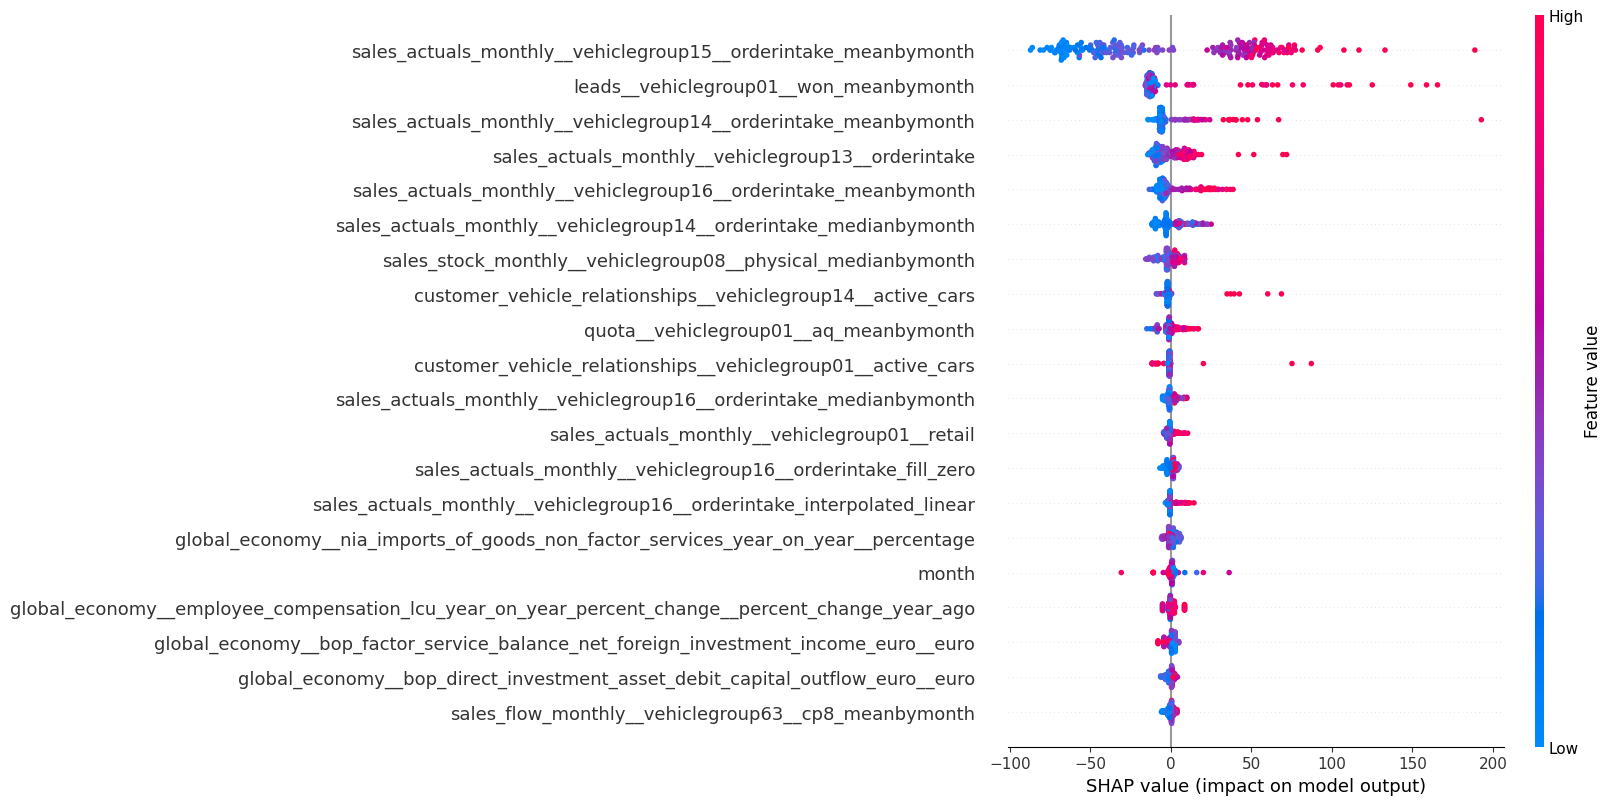

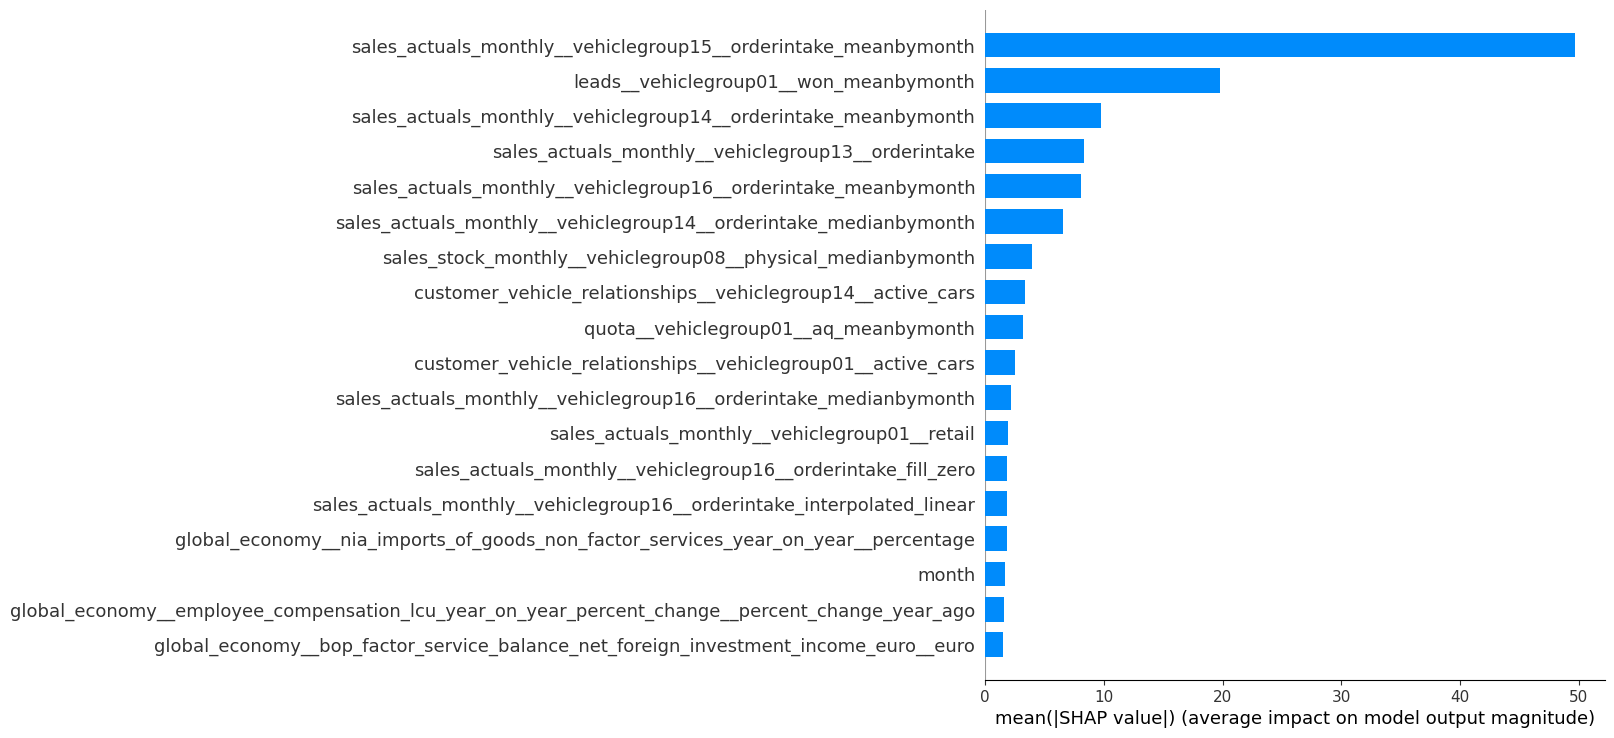

In [27]:
shap.summary_plot(shap_values, X)
shap.summary_plot(shap_values, X, plot_type='bar', max_display=18)

In [28]:
#pd.DataFrame(shap_values.values[0], index = X.columns)

shap_df = pd.DataFrame(shap_values.values, columns=X.columns)

# Calculate the mean absolute value for each feature
feature_importance = shap_df.abs().mean(axis=0)

# Create a DataFrame with feature names and their mean absolute SHAP values
feature_importance_df = pd.DataFrame({'Feature': feature_importance.index, 'Mean_SHAP': feature_importance.values})

# Sort the DataFrame based on mean absolute SHAP values in descending order
feature_importance_df = feature_importance_df.sort_values(by='Mean_SHAP', ascending=False)

print(feature_importance_df)

                                                Feature  Mean_SHAP
1499  sales_actuals_monthly__vehiclegroup15__orderin...  49.710316
3664             leads__vehiclegroup01__won_meanbymonth  19.826761
1489  sales_actuals_monthly__vehiclegroup14__orderin...   9.786319
9     sales_actuals_monthly__vehiclegroup13__orderin...   8.332897
1509  sales_actuals_monthly__vehiclegroup16__orderin...   8.054875
...                                                 ...        ...
2175  sales_flow_monthly__vehiclegroup45__cp8_median...   0.000000
2174  sales_flow_monthly__vehiclegroup45__cp8_meanby...   0.000000
2173  sales_flow_monthly__vehiclegroup44__cp8_fill_zero   0.000000
2172  sales_flow_monthly__vehiclegroup44__cp8_interp...   0.000000
5984                                          countryNo   0.000000

[5985 rows x 2 columns]


In [39]:
# Assuming feature_importance_df is your original DataFrame
endings = ['_meanbymonth', '_medianbymonth', '_interpolated_linear', '_interpolation_spline', '_fill_zero']

def get_base_name(feature_name):
    for ending in endings:
        if ending in feature_name:
            return feature_name.replace(ending, '')
    return feature_name

rows_to_add = []
seen_base_names = set()

for _, row in feature_importance_df.iterrows():
    feature_name = str(row['Feature'])  # Ensure this matches your column name
    base_name = get_base_name(feature_name)
    #print(row)
    if base_name not in seen_base_names:
        seen_base_names.add(base_name)
        rows_to_add.append(row)
        #print(row)

# Create the new DataFrame from the accumulated rows
new_df = pd.DataFrame(rows_to_add, columns=feature_importance_df.columns)
new_df.reset_index(drop=True, inplace=True)

print(new_df)

new_df.to_csv('../output_data/'+filename+datetime.datetime.now().strftime("%H%M")+'value_importance_list.csv')

                                                Feature  Mean_SHAP
0     sales_actuals_monthly__vehiclegroup15__orderin...  49.710316
1                leads__vehiclegroup01__won_meanbymonth  19.826761
2     sales_actuals_monthly__vehiclegroup14__orderin...   9.786319
3     sales_actuals_monthly__vehiclegroup13__orderin...   8.332897
4     sales_actuals_monthly__vehiclegroup16__orderin...   8.054875
...                                                 ...        ...
2316  sales_flow_monthly__vehiclegroup44__cp8_meanby...   0.000000
2317  sales_flow_monthly__vehiclegroup47__cp8_fill_zero   0.000000
2318  sales_flow_monthly__vehiclegroup46__cp8_fill_zero   0.000000
2319  sales_flow_monthly__vehiclegroup45__cp8_fill_zero   0.000000
2320                                          countryNo   0.000000

[2321 rows x 2 columns]


In [36]:
row

Feature      countryNo
Mean_SHAP          0.0
Name: 5984, dtype: object